# DETECTING LINGUISTIC CUES IN ALZHEIMER'S DISEASE PATIENTS

### DATA PREPROCESSING 

In [1]:
# Importing all dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import the .tsv file as a dataframe 

dataframe = pd.read_csv('data.tsv', delimiter = '\t', quoting = 3)
dataframe

,Transcript,AD
0,there's um a young boy that's getting a cookie...,1
1,and it he's uh in bad shape because uh the thi...,1
2,and in the picture the mother is washing dishe...,1
3,and so is the the water is overflowing in the ...,1
4,and the dishes might get falled over if you do...,1
5,and it there it's a picture of a kitchen window,1
6,and the curtains are very uh distinct,1
7,but the water is flow still flowing,1
8,there's a young boy uh going in a cookie jar,1
9,and there's a uh a girl young girl,1


In [3]:
# Create the list of custom stopwords

customStopwords = {'a','are','about','above','after','again','against','ain','all','am','an','any','aren',"aren't",'as',
                   'at','be','because','been','before','being','below','between','both','but','by',
                   'can','couldn',"couldn't",'d','didn',"didn't",'do','does','doesn',"doesn't",'doing','don',"don't",
                   'down','during','each','few','for','from','further','had','hadn',"hadn't",'has','hasn',"hasn't",
                   'have','haven',"haven't",'having','he','her','here','hers','herself','him','himself','his','how', 'i','if', 
                   'in', 'into','is','isn',"isn't", "it's",'its','itself','just','ll','m','ma','me','mightn',"mightn't",
                   'more','most','mustn',"mustn't",'my','myself','needn',"needn't",'no','nor','not','now', 'o','of',
                   'off','on','once','only','or','other','our','ours','ourselves','out','over','own','re','s','same',
                   'shan',"shan't",'she',"she's",'should',"should've",'shouldn',"shouldn't",'so','some','such','t','than','that',"that'll",
                   'the','there',"there's",'their','theirs','them','themselves','then','these','they','this','those','through','to','too',
                   'under','until','up','ve','very','was','wasn',"wasn't",'we','were','weren',"weren't",'what','when',
                   'where','which','while','who','whom','why','will','with','won',"won't",'wouldn', "wouldn't",'y',
                   'you',"you'd","you'll","you're","you've",'your','yours','yourself','yourselves'}

In [4]:
# Applying all preprocessing steps on entire dataframe

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

corpus = []

for i in range(1875):
    # remove all symbols, keep only alphabets
    utt = re.sub('[^a-zA-Z]',' ',dataframe['Transcript'][i])
    # convert to lowercase
    utt = utt.lower()
    # split into words
    utt = utt.split()
    # remove stopwords
    utt = [word for word in utt if not word in customStopwords]
    # performing lemmatization
    lem = WordNetLemmatizer()
    utt = [lem.lemmatize(word) for word in utt]
    # join back to form sentences
    utt = ' '.join(utt)
    # append to variable corpus
    corpus.append(utt)

corpus[:21]

['um young boy getting cookie jar',
 'and it uh bad shape uh thing falling',
 'and picture mother washing dish and see it',
 'and water overflowing sink',
 'and dish might get falled fell fall get it',
 'and it it picture kitchen window',
 'and curtain uh distinct',
 'water flow still flowing',
 'young boy uh going cookie jar',
 'and uh girl young girl',
 'and saying boy hard it hardly hard tell anymore',
 'uh and cookie jar',
 'and stool and it already starting fall',
 'and water sink uh overflowing sink',
 'hm know hickey whether said',
 'uh like it uh wife mean uh mother near girl',
 'and uh uh uh',
 'oh uh think',
 'uh trying wipe uh wipe dish',
 'oh and stop water going',
 'cookie jar']

In [5]:
corpus = pd.DataFrame(data = corpus, columns = ['Transcript'])
corpus

,Transcript
0,um young boy getting cookie jar
1,and it uh bad shape uh thing falling
2,and picture mother washing dish and see it
3,and water overflowing sink
4,and dish might get falled fell fall get it
5,and it it picture kitchen window
6,and curtain uh distinct
7,water flow still flowing
8,young boy uh going cookie jar
9,and uh girl young girl


In [6]:
corpus.replace('', np.nan, inplace=True)
corpus

,Transcript
0,um young boy getting cookie jar
1,and it uh bad shape uh thing falling
2,and picture mother washing dish and see it
3,and water overflowing sink
4,and dish might get falled fell fall get it
5,and it it picture kitchen window
6,and curtain uh distinct
7,water flow still flowing
8,young boy uh going cookie jar
9,and uh girl young girl


In [7]:
corpus['AD'] = dataframe['AD'].values
corpus

,Transcript,AD
0,um young boy getting cookie jar,1
1,and it uh bad shape uh thing falling,1
2,and picture mother washing dish and see it,1
3,and water overflowing sink,1
4,and dish might get falled fell fall get it,1
5,and it it picture kitchen window,1
6,and curtain uh distinct,1
7,water flow still flowing,1
8,young boy uh going cookie jar,1
9,and uh girl young girl,1


In [8]:
print(corpus.isna().sum().sum())
corpus.dropna(inplace = True)
print(corpus.isna().sum().sum())

19
0


In [9]:
# create y vector
y = corpus.iloc[:,1].values

In [10]:
# --- TO RESOLVE INTERNAL DATASET TABBED ERRORS ---

# replace tabbed 0 errors in .tsv file

index = [ 791,  792,  793,  830,  831,  832,  833,  839,  844,  852,  853,
         855,  858,  860,  876,  882,  890,  892,  904,  909,  912,  936,
         938,  943,  945,  957,  964,  965,  967,  969,  972,  975,  976,
        1000, 1007, 1013, 1018, 1297]
for i in index:
    y[i] = 0
    
# replace tabbed 1 errors in .tsv file
index = [1072, 1101, 1184, 1244]
for i in index:
    y[i] = 1

y[846] = 0   # 'o    ' error

y = y.astype(int)   # cast to type integer

In [11]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [12]:
# take only transcripts

corpus = corpus['Transcript'].tolist()

In [13]:
# tokenisation

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [14]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
print(X.shape)
print(y.shape)

(1856, 787)
(1856,)


### PERFORMING K-MEANS CLUSTERING ANALYSIS ON THE DATA

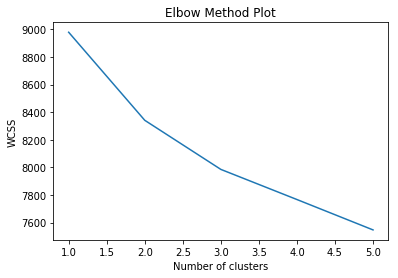

In [16]:
# K-means clustering 

from sklearn.cluster import KMeans
wcss = []
for i in range (1,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,6),wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# WCSS drop recedes slowly at n_clusters = 3
# predict based on both columns

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 1, 1, ..., 1, 1, 0], dtype=int32)

In [18]:
print("Top terms per cluster:")
print()

#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

terms = cv.get_feature_names()
for i in range(3):
    print('Cluster %d:' % i)
    for index in order_centroids[i, :6]:
        print(' %s' % terms[index])
    print()
print()

Top terms per cluster:

Cluster 0:
 it
 uh
 dish
 water
 mother
 sink

Cluster 1:
 and
 uh
 dish
 it
 water
 sink

Cluster 2:
 cookie
 jar
 boy
 and
 little
 girl




### BUILDING THE NEURAL NETWORK MODELS

In [19]:
# import keras modules
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
# split corpus for word embeddings

from sklearn.model_selection import train_test_split

Xwords_train, Xwords_test, ywords_train, ywords_test = train_test_split(corpus, y, test_size = 0.2, random_state = 0)

In [22]:
# Building the Embeddings layer for the CNN
# Using the Tokenizer utility from Keras

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 2000)
tokenizer.fit_on_texts(Xwords_train)

Xwords_train = tokenizer.texts_to_sequences(Xwords_train)
Xwords_test = tokenizer.texts_to_sequences(Xwords_test)

In [23]:
vocab = len(tokenizer.word_index) + 1   # Add one for the zero indexing
vocab

706

In [24]:
# introducing padding for even length sequences

from keras.preprocessing.sequence import pad_sequences

Xwords_train = pad_sequences(Xwords_train, padding = 'post', maxlen = 100)
Xwords_test = pad_sequences(Xwords_test, padding = 'post', maxlen = 100)

In [25]:
# Verifying shape of training and test splits

print(Xwords_train.shape)
print(Xwords_test.shape)
print(ywords_train.shape)
print(ywords_test.shape)

(1484, 100)
(372, 100)
(1484,)
(372,)


#### 1. CREATION OF CNN

In [26]:
# Importing Keras dependencies

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

In [27]:
# Initialize CNN
cnn = Sequential()

# Common lengths for embeddings (output_dim) are between 100 and 300. 
# Anything less than 100 isn't enough to represent the vocabulary properly
# Input length is maxlen of the padded sequence

cnn.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
cnn.add(Conv1D(128, 5, activation='relu'))   # filters = 128, kernel size = 5 
cnn.add(MaxPooling1D(pool_size = 2))
cnn.add(Flatten())
cnn.add(Dense(units = 256, activation = 'relu'))    # Fully Connected Layer
cnn.add(Dense(units = 1, activation = 'sigmoid'))   # Output layer

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
cnn.fit(Xwords_train, ywords_train, 
          epochs=20, batch_size=128, verbose=1, 
          validation_data=(Xwords_test, ywords_test))

Train on 1484 samples, validate on 372 samples
Epoch 1/20
1484/1484 [==============================] - 2s 1ms/step - loss: 0.6822 - acc: 0.5896 - val_loss: 0.6859 - val_acc: 0.5780
Epoch 2/20
1484/1484 [==============================] - 1s 862us/step - loss: 0.6762 - acc: 0.5923 - val_loss: 0.6744 - val_acc: 0.5806
Epoch 3/20
1484/1484 [==============================] - 1s 879us/step - loss: 0.6535 - acc: 0.6011 - val_loss: 0.6667 - val_acc: 0.6586
Epoch 4/20
1484/1484 [==============================] - 1s 859us/step - loss: 0.6061 - acc: 0.6981 - val_loss: 0.6346 - val_acc: 0.6398
Epoch 5/20
1484/1484 [==============================] - 1s 921us/step - loss: 0.5056 - acc: 0.7648 - val_loss: 0.6422 - val_acc: 0.6613
Epoch 6/20
1484/1484 [==============================] - 1s 873us/step - loss: 0.3977 - acc: 0.8282 - val_loss: 0.6629 - val_acc: 0.6613
Epoch 7/20
1484/1484 [==============================] - 1s 850us/step - loss: 0.3285 - acc: 0.8558 - val_loss: 0.7434 - val_acc: 0.6613
Epo

In [29]:
scores = cnn.evaluate(Xwords_test, ywords_test, verbose=1)
print("Accuracy:", scores[1])

372/372 [==============================] - 0s 337us/step
Accuracy: 0.6774193554796198


#### PERFORMING HYPERPARAMETER OPTIMISATION FOR CNN

In [31]:
# Defining function to create model
# After all steps of grid search are completed, the best parameters are fitted into this function

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

def model_cnn_create(neurons = 256, optimizer = 'RMSprop', activation = 'softmax', kernel_init = 'uniform',
                 dropout_rate = 0.1, weight_constraint = 3, nb_filters = 128, kernel_size = 3):
    
    model = Sequential()
    model.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
    model.add(Conv1D(nb_filters, kernel_size, activation = 'relu'))   
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Flatten())
    model.add(Dense(units = neurons, activation = activation, kernel_init = kernel_init, kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dense(units = 1, activation = 'sigmoid', kernel_init = kernel_init))   
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [125]:
# Tuning the optimum number of neurons in the Hidden (Fully Connected) layer

# Level 1 - 32,64,128
# Level 2 - 128, 256
param_grid = {
    'neurons': [128,256]
}

model = KerasClassifier(build_fn = model_cnn_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] neurons=128 .....................................................
Epoch 1/1
 - 25s - loss: 0.6850 - acc: 0.5683
[CV] ............ neurons=128, score=0.5979797984614517, total=  34.5s
[CV] neurons=128 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.0s remaining:    0.0s


Epoch 1/1
 - 23s - loss: 0.6822 - acc: 0.5703
[CV] ............ neurons=128, score=0.6040404047628846, total=  34.0s
[CV] neurons=128 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


Epoch 1/1
 - 25s - loss: 0.6800 - acc: 0.6010
[CV] ............ neurons=128, score=0.5668016195538556, total=  35.2s
[CV] neurons=256 .....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.8min remaining:    0.0s


Epoch 1/1
 - 24s - loss: 0.6860 - acc: 0.5834
[CV] ............ neurons=256, score=0.6000000004816537, total=  34.4s
[CV] neurons=256 .....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


Epoch 1/1
 - 24s - loss: 0.6906 - acc: 0.5592
[CV] ............ neurons=256, score=0.6040404047628846, total=  34.1s
[CV] neurons=256 .....................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s


Epoch 1/1
 - 25s - loss: 0.6768 - acc: 0.6010
[CV] ............ neurons=256, score=0.5668016195538556, total=  34.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.5min finished


Epoch 1/1
 - 24s - loss: 0.6842 - acc: 0.5627
Best accuracy:  0.5902964963986868
Best parameters:  {'neurons': 256}


In [127]:
# Tuning the kernel size and number of filters

param_grid = {
    'nb_filters': [32, 64, 128],
    'kernel_size': [3,5,7]
}

model = KerasClassifier(build_fn = model_cnn_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] kernel_size=3, nb_filters=32 ....................................
Epoch 1/1
 - 25s - loss: 0.6818 - acc: 0.5854
[CV]  kernel_size=3, nb_filters=32, score=0.5979797984614517, total=  35.7s
[CV] kernel_size=3, nb_filters=32 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.9s remaining:    0.0s


Epoch 1/1
 - 23s - loss: 0.6863 - acc: 0.5784
[CV]  kernel_size=3, nb_filters=32, score=0.6040404047628846, total=  33.1s
[CV] kernel_size=3, nb_filters=32 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


Epoch 1/1
 - 24s - loss: 0.6763 - acc: 0.6010
[CV]  kernel_size=3, nb_filters=32, score=0.5668016195538556, total=  35.2s
[CV] kernel_size=3, nb_filters=64 ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


Epoch 1/1
 - 25s - loss: 0.6832 - acc: 0.5814
[CV]  kernel_size=3, nb_filters=64, score=0.5979797984614517, total=  34.8s
[CV] kernel_size=3, nb_filters=64 ....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


Epoch 1/1
 - 23s - loss: 0.6892 - acc: 0.5763
[CV]  kernel_size=3, nb_filters=64, score=0.6040404047628846, total=  34.1s
[CV] kernel_size=3, nb_filters=64 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s


Epoch 1/1
 - 23s - loss: 0.6758 - acc: 0.6030
[CV]  kernel_size=3, nb_filters=64, score=0.5668016195538556, total=  33.7s
[CV] kernel_size=3, nb_filters=128 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.5min remaining:    0.0s


Epoch 1/1
 - 27s - loss: 0.6863 - acc: 0.5834
[CV]  kernel_size=3, nb_filters=128, score=0.5979797984614517, total=  37.6s
[CV] kernel_size=3, nb_filters=128 ...................................
Epoch 1/1
 - 24s - loss: 0.6827 - acc: 0.5824
[CV]  kernel_size=3, nb_filters=128, score=0.6080808088032886, total=  35.4s
[CV] kernel_size=3, nb_filters=128 ...................................
Epoch 1/1
 - 25s - loss: 0.6789 - acc: 0.6010
[CV]  kernel_size=3, nb_filters=128, score=0.5668016195538556, total=  36.7s
[CV] kernel_size=5, nb_filters=32 ....................................
Epoch 1/1
 - 24s - loss: 0.6915 - acc: 0.5794
[CV]  kernel_size=5, nb_filters=32, score=0.5979797984614517, total=  34.4s
[CV] kernel_size=5, nb_filters=32 ....................................
Epoch 1/1
 - 25s - loss: 0.6845 - acc: 0.5784
[CV]  kernel_size=5, nb_filters=32, score=0.6040404047628846, total=  35.8s
[CV] kernel_size=5, nb_filters=32 ....................................
Epoch 1/1
 - 24s - loss: 0.6823 

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 16.3min finished


Epoch 1/1
 - 26s - loss: 0.6822 - acc: 0.5856
Best accuracy:  0.590970350846126
Best parameters:  {'kernel_size': 3, 'nb_filters': 128}


In [130]:
# Tuning batch size and epochs

param_grid = {
    'batch_size': [24,40,64,100],
    'epochs': [10,15,20,25]
}

model = KerasClassifier(build_fn = model_cnn_create, verbose = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] batch_size=24, epochs=10 ........................................
Epoch 1/10
989/989 [==============================] - 27s 27ms/step - loss: 0.6861 - acc: 0.5824
Epoch 2/10
989/989 [==============================] - 2s 2ms/step - loss: 0.6335 - acc: 0.6502
Epoch 3/10
989/989 [==============================] - 2s 2ms/step - loss: 0.4757 - acc: 0.7695
Epoch 4/10
989/989 [==============================] - 2s 2ms/step - loss: 0.3437 - acc: 0.8554
Epoch 5/10
989/989 [==============================] - 2s 2ms/step - loss: 0.2557 - acc: 0.8948
Epoch 6/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1887 - acc: 0.9211
Epoch 7/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1564 - acc: 0.9323
Epoch 8/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1306 - acc: 0.9353
Epoch 9/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1268 - acc: 0.9424
Epoch 10/10

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.0s remaining:    0.0s


Epoch 1/10
989/989 [==============================] - 26s 26ms/step - loss: 0.6835 - acc: 0.5814
Epoch 2/10
989/989 [==============================] - 2s 2ms/step - loss: 0.6683 - acc: 0.6036
Epoch 3/10
989/989 [==============================] - 2s 2ms/step - loss: 0.5303 - acc: 0.7523
Epoch 4/10
989/989 [==============================] - 2s 2ms/step - loss: 0.3499 - acc: 0.8453
Epoch 5/10
989/989 [==============================] - 2s 2ms/step - loss: 0.2486 - acc: 0.8969
Epoch 6/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1783 - acc: 0.9312
Epoch 7/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1447 - acc: 0.9393
Epoch 8/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1171 - acc: 0.9535
Epoch 9/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1022 - acc: 0.9575
Epoch 10/10
989/989 [==============================] - 1s 587us/step
[CV]  batch_size=24, epochs=10, score=0.6686868663990136, total=  52.1s
[C

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


Epoch 1/10
990/990 [==============================] - 26s 26ms/step - loss: 0.6813 - acc: 0.5808
Epoch 2/10
990/990 [==============================] - 2s 2ms/step - loss: 0.6483 - acc: 0.6010
Epoch 3/10
990/990 [==============================] - 2s 2ms/step - loss: 0.5254 - acc: 0.7515
Epoch 4/10
990/990 [==============================] - ETA: 0s - loss: 0.3842 - acc: 0.814 - 2s 2ms/step - loss: 0.3853 - acc: 0.8131
Epoch 5/10
990/990 [==============================] - 2s 2ms/step - loss: 0.2826 - acc: 0.8818
Epoch 6/10
990/990 [==============================] - 2s 2ms/step - loss: 0.2278 - acc: 0.9040
Epoch 7/10
990/990 [==============================] - 2s 2ms/step - loss: 0.1952 - acc: 0.9212
Epoch 8/10
990/990 [==============================] - 2s 2ms/step - loss: 0.1674 - acc: 0.9263
Epoch 9/10
990/990 [==============================] - 2s 2ms/step - loss: 0.1566 - acc: 0.9293
Epoch 10/10
990/990 [==============================] - 1s 556us/step
[CV]  batch_size=24, epochs=10, scor

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min remaining:    0.0s


Epoch 1/15
989/989 [==============================] - 26s 27ms/step - loss: 0.6883 - acc: 0.5703
Epoch 2/15
989/989 [==============================] - 2s 2ms/step - loss: 0.6674 - acc: 0.6036
Epoch 3/15
989/989 [==============================] - 2s 2ms/step - loss: 0.5492 - acc: 0.7219
Epoch 4/15
989/989 [==============================] - 2s 2ms/step - loss: 0.3635 - acc: 0.8463
Epoch 5/15
989/989 [==============================] - 2s 2ms/step - loss: 0.2409 - acc: 0.8999
Epoch 6/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1885 - acc: 0.9191
Epoch 7/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1612 - acc: 0.9282
Epoch 8/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1273 - acc: 0.9403
Epoch 9/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1178 - acc: 0.9424
Epoch 10/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1070 - acc: 0.9484
Epoch 11/15
989/989 [==========================

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.7min remaining:    0.0s


Epoch 1/15
989/989 [==============================] - 26s 26ms/step - loss: 0.6873 - acc: 0.5662
Epoch 2/15
989/989 [==============================] - 2s 2ms/step - loss: 0.6704 - acc: 0.5784
Epoch 3/15
989/989 [==============================] - 2s 2ms/step - loss: 0.5560 - acc: 0.6987
Epoch 4/15
989/989 [==============================] - 2s 2ms/step - loss: 0.3753 - acc: 0.8342A: 1s - loss: 0
Epoch 5/15
989/989 [==============================] - 2s 2ms/step - loss: 0.2587 - acc: 0.8857
Epoch 6/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1976 - acc: 0.9191
Epoch 7/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1563 - acc: 0.9282
Epoch 8/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1342 - acc: 0.9474
Epoch 9/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1143 - acc: 0.9596
Epoch 10/15
989/989 [==============================] - 2s 2ms/step - loss: 0.1097 - acc: 0.9555
Epoch 11/15
989/989 [===========

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.8min remaining:    0.0s


Epoch 1/15
990/990 [==============================] - 26s 27ms/step - loss: 0.6820 - acc: 0.5929
Epoch 2/15
990/990 [==============================] - 2s 2ms/step - loss: 0.6392 - acc: 0.6111
Epoch 3/15
990/990 [==============================] - 2s 2ms/step - loss: 0.5166 - acc: 0.7707
Epoch 4/15
990/990 [==============================] - 2s 2ms/step - loss: 0.3922 - acc: 0.8222
Epoch 5/15
990/990 [==============================] - 2s 2ms/step - loss: 0.2895 - acc: 0.8677
Epoch 6/15
990/990 [==============================] - 2s 2ms/step - loss: 0.2270 - acc: 0.9030
Epoch 7/15
990/990 [==============================] - 2s 2ms/step - loss: 0.1876 - acc: 0.9212
Epoch 8/15
990/990 [==============================] - 2s 2ms/step - loss: 0.1700 - acc: 0.9263
Epoch 9/15
990/990 [==============================] - 2s 2ms/step - loss: 0.1545 - acc: 0.9364
Epoch 10/15
990/990 [==============================] - 2s 2ms/step - loss: 0.1372 - acc: 0.9455
Epoch 11/15
990/990 [==========================

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.8min remaining:    0.0s


Epoch 1/20
989/989 [==============================] - 26s 26ms/step - loss: 0.6851 - acc: 0.5561
Epoch 2/20
989/989 [==============================] - 2s 2ms/step - loss: 0.6473 - acc: 0.6148
Epoch 3/20
989/989 [==============================] - 2s 2ms/step - loss: 0.4750 - acc: 0.7816
Epoch 4/20
989/989 [==============================] - 2s 2ms/step - loss: 0.3249 - acc: 0.8524
Epoch 5/20
989/989 [==============================] - 2s 2ms/step - loss: 0.2533 - acc: 0.8827
Epoch 6/20
989/989 [==============================] - 2s 2ms/step - loss: 0.1808 - acc: 0.9282
Epoch 7/20
989/989 [==============================] - 2s 2ms/step - loss: 0.1618 - acc: 0.9292
Epoch 8/20
989/989 [==============================] - 2s 2ms/step - loss: 0.1304 - acc: 0.9464
Epoch 9/20
989/989 [==============================] - 2s 2ms/step - loss: 0.1095 - acc: 0.9474
Epoch 10/20
989/989 [==============================] - 2s 2ms/step - loss: 0.1009 - acc: 0.9515
Epoch 11/20
989/989 [==========================

989/989 [==============================] - 1s 1ms/step - loss: 0.1632 - acc: 0.9363
Epoch 9/10
989/989 [==============================] - 1s 1ms/step - loss: 0.1318 - acc: 0.9525
Epoch 10/10
989/989 [==============================] - 0s 454us/step
[CV]  batch_size=40, epochs=10, score=0.6808080823734554, total=  49.5s
[CV] batch_size=40, epochs=10 ........................................
Epoch 1/10
990/990 [==============================] - 26s 26ms/step - loss: 0.6778 - acc: 0.6010
Epoch 2/10
990/990 [==============================] - 1s 1ms/step - loss: 0.6484 - acc: 0.6384
Epoch 3/10
990/990 [==============================] - 1s 1ms/step - loss: 0.5503 - acc: 0.7212
Epoch 4/10
990/990 [==============================] - 1s 1ms/step - loss: 0.4070 - acc: 0.8101
Epoch 5/10
990/990 [==============================] - 1s 1ms/step - loss: 0.2830 - acc: 0.8879
Epoch 6/10
990/990 [==============================] - 1s 1ms/step - loss: 0.2338 - acc: 0.9040
Epoch 7/10
990/990 [=================

Epoch 4/25
989/989 [==============================] - 1s 1ms/step - loss: 0.4247 - acc: 0.8099
Epoch 5/25
989/989 [==============================] - 1s 1ms/step - loss: 0.3002 - acc: 0.8716
Epoch 6/25
989/989 [==============================] - 1s 1ms/step - loss: 0.2401 - acc: 0.8959
Epoch 7/25
989/989 [==============================] - 1s 1ms/step - loss: 0.1823 - acc: 0.9282
Epoch 8/25
989/989 [==============================] - 1s 1ms/step - loss: 0.1593 - acc: 0.9383
Epoch 9/25
989/989 [==============================] - 1s 1ms/step - loss: 0.1348 - acc: 0.9474
Epoch 10/25
989/989 [==============================] - 1s 1ms/step - loss: 0.1205 - acc: 0.9515
Epoch 11/25
989/989 [==============================] - 1s 1ms/step - loss: 0.1168 - acc: 0.9505
Epoch 12/25
989/989 [==============================] - 1s 1ms/step - loss: 0.0979 - acc: 0.9656
Epoch 13/25
989/989 [==============================] - 1s 1ms/step - loss: 0.0941 - acc: 0.9636
Epoch 14/25
989/989 [=========================

Epoch 9/10
990/990 [==============================] - 1s 1ms/step - loss: 0.1782 - acc: 0.9242
Epoch 10/10
990/990 [==============================] - 0s 466us/step
[CV]  batch_size=64, epochs=10, score=0.6639676089228889, total=  50.6s
[CV] batch_size=64, epochs=15 ........................................
Epoch 1/15
989/989 [==============================] - 27s 27ms/step - loss: 0.6900 - acc: 0.5723
Epoch 2/15
989/989 [==============================] - 1s 1ms/step - loss: 0.6688 - acc: 0.5885
Epoch 3/15
989/989 [==============================] - 1s 1ms/step - loss: 0.6315 - acc: 0.6532
Epoch 4/15
989/989 [==============================] - 1s 1ms/step - loss: 0.5165 - acc: 0.7654
Epoch 5/15
989/989 [==============================] - 1s 1ms/step - loss: 0.3738 - acc: 0.8372
Epoch 6/15
989/989 [==============================] - 1s 1ms/step - loss: 0.2700 - acc: 0.8878
Epoch 7/15
989/989 [==============================] - 1s 1ms/step - loss: 0.2239 - acc: 0.9130
Epoch 8/15
989/989 [======

989/989 [==============================] - 1s 1ms/step - loss: 0.0828 - acc: 0.9646
Epoch 19/25
989/989 [==============================] - 1s 1ms/step - loss: 0.0725 - acc: 0.9727
Epoch 20/25
989/989 [==============================] - 1s 1ms/step - loss: 0.0700 - acc: 0.9727
Epoch 21/25
989/989 [==============================] - 1s 1ms/step - loss: 0.0833 - acc: 0.9656
Epoch 22/25
989/989 [==============================] - 1s 1ms/step - loss: 0.0662 - acc: 0.9717
Epoch 23/25
989/989 [==============================] - 1s 1ms/step - loss: 0.0637 - acc: 0.9727
Epoch 24/25
989/989 [==============================] - 1s 1ms/step - loss: 0.0659 - acc: 0.9707
Epoch 25/25
989/989 [==============================] - 0s 447us/step
[CV]  batch_size=64, epochs=25, score=0.6464646453809256, total= 1.2min
[CV] batch_size=64, epochs=25 ........................................
Epoch 1/25
990/990 [==============================] - 34s 34ms/step - loss: 0.6779 - acc: 0.5717
Epoch 2/25
990/990 [===========

989/989 [==============================] - 1s 967us/step - loss: 0.0852 - acc: 0.9666
Epoch 19/20
989/989 [==============================] - 1s 963us/step - loss: 0.0824 - acc: 0.9687
Epoch 20/20
989/989 [==============================] - 0s 347us/step
[CV]  batch_size=100, epochs=20, score=0.648484853180972, total= 1.1min
[CV] batch_size=100, epochs=20 .......................................
Epoch 1/20
990/990 [==============================] - 30s 31ms/step - loss: 0.6808 - acc: 0.6010
Epoch 2/20
990/990 [==============================] - 1s 1ms/step - loss: 0.6738 - acc: 0.6010
Epoch 3/20
990/990 [==============================] - 1s 1ms/step - loss: 0.6532 - acc: 0.6010
Epoch 4/20
990/990 [==============================] - 1s 1ms/step - loss: 0.6099 - acc: 0.6394
Epoch 5/20
990/990 [==============================] - 1s 982us/step - loss: 0.5255 - acc: 0.7354
Epoch 6/20
990/990 [==============================] - 1s 1ms/step - loss: 0.4125 - acc: 0.8242
Epoch 7/20
990/990 [==========

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 60.2min finished


Epoch 1/10
1484/1484 [==============================] - 37s 25ms/step - loss: 0.6830 - acc: 0.5903
Epoch 2/10
1484/1484 [==============================] - 2s 2ms/step - loss: 0.6369 - acc: 0.6415
Epoch 3/10
1484/1484 [==============================] - 3s 2ms/step - loss: 0.5077 - acc: 0.7426
Epoch 4/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.3749 - acc: 0.8309
Epoch 5/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.2869 - acc: 0.8814
Epoch 6/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.2320 - acc: 0.9070
Epoch 7/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.1912 - acc: 0.9265
Epoch 8/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.1599 - acc: 0.9279
Epoch 9/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.1427 - acc: 0.9367
Epoch 10/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.1360 - acc: 0.9353
Best accuracy:  0.676549867

In [131]:
# Choosing the best optimization algorithm

param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
}

model = KerasClassifier(build_fn = model_cnn_create, batch_size = 40, epochs = 10, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] optimizer=SGD ...................................................
Epoch 1/10
 - 31s - loss: 0.6912 - acc: 0.5389
Epoch 2/10
 - 1s - loss: 0.6847 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6811 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6788 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6785 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6783 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6783 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6781 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6782 - acc: 0.5854
[CV] ........... optimizer=SGD, score=0.597979797979798, total=  52.8s
[CV] optimizer=SGD ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.4s remaining:    0.0s


Epoch 1/10
 - 31s - loss: 0.6869 - acc: 0.5824
Epoch 2/10
 - 1s - loss: 0.6829 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6811 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6802 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6797 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6795 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6796 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6795 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6795 - acc: 0.5824
[CV] ........... optimizer=SGD, score=0.604040404040404, total=  53.6s
[CV] optimizer=SGD ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


Epoch 1/10
 - 29s - loss: 0.6855 - acc: 0.6010
Epoch 2/10
 - 1s - loss: 0.6778 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6747 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6731 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6728 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6729 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6727 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6727 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6728 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6726 - acc: 0.6010
[CV] .......... optimizer=SGD, score=0.5668016194331984, total=  51.2s
[CV] optimizer=RMSprop ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min remaining:    0.0s


Epoch 1/10
 - 32s - loss: 0.6918 - acc: 0.5733
Epoch 2/10
 - 1s - loss: 0.6564 - acc: 0.6107
Epoch 3/10
 - 1s - loss: 0.5735 - acc: 0.7048
Epoch 4/10
 - 1s - loss: 0.4657 - acc: 0.7816
Epoch 5/10
 - 1s - loss: 0.3749 - acc: 0.8362
Epoch 6/10
 - 1s - loss: 0.3069 - acc: 0.8665
Epoch 7/10
 - 1s - loss: 0.2605 - acc: 0.8898
Epoch 8/10
 - 1s - loss: 0.2120 - acc: 0.9181
Epoch 9/10
 - 1s - loss: 0.1784 - acc: 0.9232
Epoch 10/10
 - 1s - loss: 0.1641 - acc: 0.9302
[CV] ...... optimizer=RMSprop, score=0.6989898989898989, total=  58.1s
[CV] optimizer=RMSprop ...............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.6min remaining:    0.0s


Epoch 1/10
 - 31s - loss: 0.6915 - acc: 0.5713
Epoch 2/10
 - 1s - loss: 0.6702 - acc: 0.6047
Epoch 3/10
 - 1s - loss: 0.6066 - acc: 0.6653
Epoch 4/10
 - 1s - loss: 0.4851 - acc: 0.7725
Epoch 5/10
 - 1s - loss: 0.3862 - acc: 0.8332
Epoch 6/10
 - 1s - loss: 0.3233 - acc: 0.8595
Epoch 7/10
 - 1s - loss: 0.2672 - acc: 0.8898
Epoch 8/10
 - 1s - loss: 0.2256 - acc: 0.9039
Epoch 9/10
 - 1s - loss: 0.1914 - acc: 0.9272
Epoch 10/10
 - 1s - loss: 0.1597 - acc: 0.9383
[CV] ....... optimizer=RMSprop, score=0.694949494949495, total=  55.3s
[CV] optimizer=RMSprop ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.6min remaining:    0.0s


Epoch 1/10
 - 29s - loss: 0.6919 - acc: 0.5990
Epoch 2/10
 - 1s - loss: 0.6522 - acc: 0.6374
Epoch 3/10
 - 1s - loss: 0.5592 - acc: 0.7242
Epoch 4/10
 - 1s - loss: 0.4489 - acc: 0.7869
Epoch 5/10
 - 1s - loss: 0.3683 - acc: 0.8293
Epoch 6/10
 - 1s - loss: 0.3050 - acc: 0.8596
Epoch 7/10
 - 1s - loss: 0.2605 - acc: 0.8879
Epoch 8/10
 - 1s - loss: 0.2243 - acc: 0.9010
Epoch 9/10
 - 1s - loss: 0.1975 - acc: 0.9081
Epoch 10/10
 - 1s - loss: 0.1775 - acc: 0.9172
[CV] ...... optimizer=RMSprop, score=0.6842105263157895, total=  52.0s
[CV] optimizer=Adagrad ...............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.4min remaining:    0.0s


Epoch 1/10
 - 28s - loss: 0.9303 - acc: 0.5814
Epoch 2/10
 - 1s - loss: 0.6180 - acc: 0.6289
Epoch 3/10
 - 1s - loss: 0.4834 - acc: 0.7492
Epoch 4/10
 - 1s - loss: 0.3311 - acc: 0.8554
Epoch 5/10
 - 1s - loss: 0.2573 - acc: 0.8918
Epoch 6/10
 - 1s - loss: 0.1948 - acc: 0.9232
Epoch 7/10
 - 1s - loss: 0.1677 - acc: 0.9302
Epoch 8/10
 - 1s - loss: 0.1423 - acc: 0.9403
Epoch 9/10
 - 1s - loss: 0.1254 - acc: 0.9434
Epoch 10/10
 - 1s - loss: 0.1109 - acc: 0.9535
[CV] ...... optimizer=Adagrad, score=0.6606060606060606, total=  50.5s
[CV] optimizer=Adagrad ...............................................
Epoch 1/10
 - 28s - loss: 0.9563 - acc: 0.5612
Epoch 2/10
 - 1s - loss: 0.6296 - acc: 0.6663
Epoch 3/10
 - 1s - loss: 0.4638 - acc: 0.7856
Epoch 4/10
 - 1s - loss: 0.3264 - acc: 0.8584
Epoch 5/10
 - 1s - loss: 0.2470 - acc: 0.9019
Epoch 6/10
 - 1s - loss: 0.1948 - acc: 0.9242
Epoch 7/10
 - 1s - loss: 0.1693 - acc: 0.9262
Epoch 8/10
 - 1s - loss: 0.1481 - acc: 0.9454
Epoch 9/10
 - 1s - loss: 0.

Epoch 9/10
 - 1s - loss: 0.0992 - acc: 0.9555
Epoch 10/10
 - 1s - loss: 0.0882 - acc: 0.9636
[CV] ........ optimizer=Nadam, score=0.6808080808080809, total= 1.6min
[CV] optimizer=Nadam .................................................
Epoch 1/10
 - 30s - loss: 0.6822 - acc: 0.5747
Epoch 2/10
 - 1s - loss: 0.6238 - acc: 0.6404
Epoch 3/10
 - 1s - loss: 0.4407 - acc: 0.7939
Epoch 4/10
 - 1s - loss: 0.2914 - acc: 0.8717
Epoch 5/10
 - 1s - loss: 0.2205 - acc: 0.9030
Epoch 6/10
 - 1s - loss: 0.1784 - acc: 0.9202
Epoch 7/10
 - 1s - loss: 0.1446 - acc: 0.9354
Epoch 8/10
 - 1s - loss: 0.1271 - acc: 0.9455
Epoch 9/10
 - 1s - loss: 0.1156 - acc: 0.9515
Epoch 10/10
 - 1s - loss: 0.1060 - acc: 0.9596
[CV] ........ optimizer=Nadam, score=0.6336032388663968, total=  55.6s


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 21.2min finished


Epoch 1/10
 - 30s - loss: 0.6905 - acc: 0.5802
Epoch 2/10
 - 2s - loss: 0.6247 - acc: 0.6435
Epoch 3/10
 - 2s - loss: 0.5317 - acc: 0.7352
Epoch 4/10
 - 2s - loss: 0.4391 - acc: 0.7999
Epoch 5/10
 - 2s - loss: 0.3621 - acc: 0.8423
Epoch 6/10
 - 2s - loss: 0.3058 - acc: 0.8646
Epoch 7/10
 - 2s - loss: 0.2733 - acc: 0.8774
Epoch 8/10
 - 2s - loss: 0.2293 - acc: 0.9009
Epoch 9/10
 - 2s - loss: 0.2060 - acc: 0.9137
Epoch 10/10
 - 2s - loss: 0.1805 - acc: 0.9205
Best accuracy:  0.692722371967655
Best parameters:  {'optimizer': 'RMSprop'}


In [137]:
# Tuning the activation function

param_grid = {
    'activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
}

model = KerasClassifier(build_fn = model_cnn_create, batch_size = 40, epochs = 10, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] activation=softmax ..............................................
Epoch 1/10
 - 1079s - loss: 0.6909 - acc: 0.5854
Epoch 2/10
 - 1s - loss: 0.6880 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6855 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6837 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6824 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6813 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6804 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6799 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6795 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6793 - acc: 0.5854
[CV] ...... activation=softmax, score=0.597979797979798, total=18.4min
[CV] activation=softmax ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 18.4min remaining:    0.0s


Epoch 1/10
 - 30s - loss: 0.6906 - acc: 0.5824
Epoch 2/10
 - 1s - loss: 0.6884 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6865 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6849 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6837 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6827 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6820 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6816 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6811 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6807 - acc: 0.5824
[CV] ...... activation=softmax, score=0.604040404040404, total=  52.6s
[CV] activation=softmax ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 19.2min remaining:    0.0s


Epoch 1/10
 - 29s - loss: 0.6905 - acc: 0.6010
Epoch 2/10
 - 1s - loss: 0.6868 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6838 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6813 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6794 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6779 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6767 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6757 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6749 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6743 - acc: 0.6010
[CV] ..... activation=softmax, score=0.5668016194331984, total=  51.8s
[CV] activation=softplus .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.1min remaining:    0.0s


Epoch 1/10
 - 29s - loss: 0.6847 - acc: 0.5854
Epoch 2/10
 - 1s - loss: 0.6830 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6840 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6803 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6876 - acc: 0.5713
Epoch 6/10
 - 1s - loss: 0.6820 - acc: 0.5733
Epoch 7/10
 - 1s - loss: 0.6820 - acc: 0.5753
Epoch 8/10
 - 1s - loss: 0.6826 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6823 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6763 - acc: 0.5834
[CV] ..... activation=softplus, score=0.597979797979798, total=  52.3s
[CV] activation=softplus .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 21.0min remaining:    0.0s


Epoch 1/10
 - 31s - loss: 0.6876 - acc: 0.5824
Epoch 2/10
 - 1s - loss: 0.6850 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6832 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6859 - acc: 0.5602
Epoch 5/10
 - 1s - loss: 0.6834 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6810 - acc: 0.5784
Epoch 7/10
 - 1s - loss: 0.6843 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6874 - acc: 0.5642
Epoch 9/10
 - 1s - loss: 0.6865 - acc: 0.5642
Epoch 10/10
 - 1s - loss: 0.6819 - acc: 0.5824
[CV] ..... activation=softplus, score=0.604040404040404, total=  53.0s
[CV] activation=softplus .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 21.9min remaining:    0.0s


Epoch 1/10
 - 30s - loss: 0.7359 - acc: 0.5384
Epoch 2/10
 - 1s - loss: 0.6793 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6768 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6772 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6771 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6762 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6767 - acc: 0.5949
Epoch 8/10
 - 1s - loss: 0.6797 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6763 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6755 - acc: 0.6010
[CV] .... activation=softplus, score=0.5668016194331984, total=  52.8s
[CV] activation=softsign .............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 22.8min remaining:    0.0s


Epoch 1/10
 - 33s - loss: 0.6820 - acc: 0.5865
Epoch 2/10
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6795 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6795 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6791 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6790 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6792 - acc: 0.5854
[CV] ..... activation=softsign, score=0.597979797979798, total= 1.1min
[CV] activation=softsign .............................................
Epoch 1/10
 - 30s - loss: 0.6842 - acc: 0.5703
Epoch 2/10
 - 1s - loss: 0.6806 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6803 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6804 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6804 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6799 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6803 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6797 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.

Epoch 9/10
 - 1s - loss: 0.6816 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6816 - acc: 0.5824
[CV] . activation=hard_sigmoid, score=0.604040404040404, total=  53.2s
[CV] activation=hard_sigmoid .........................................
Epoch 1/10
 - 30s - loss: 0.7286 - acc: 0.5162
Epoch 2/10
 - 1s - loss: 0.6755 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6752 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6769 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6752 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6769 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6770 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6775 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6787 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6733 - acc: 0.6010
[CV]  activation=hard_sigmoid, score=0.5668016194331984, total=  53.1s
[CV] activation=linear ...............................................
Epoch 1/10
 - 31s - loss: 0.6821 - acc: 0.5854
Epoch 2/10
 - 1s - loss: 0.6791 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 4/10
 - 1s - los

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 39.2min finished


Epoch 1/10
 - 33s - loss: 0.6895 - acc: 0.5896
Epoch 2/10
 - 2s - loss: 0.6857 - acc: 0.5896
Epoch 3/10
 - 2s - loss: 0.6830 - acc: 0.5896
Epoch 4/10
 - 2s - loss: 0.6812 - acc: 0.5896
Epoch 5/10
 - 2s - loss: 0.6798 - acc: 0.5896
Epoch 6/10
 - 2s - loss: 0.6790 - acc: 0.5896
Epoch 7/10
 - 2s - loss: 0.6783 - acc: 0.5896
Epoch 8/10
 - 2s - loss: 0.6780 - acc: 0.5896
Epoch 9/10
 - 2s - loss: 0.6777 - acc: 0.5896
Epoch 10/10
 - 2s - loss: 0.6775 - acc: 0.5896
Best accuracy:  0.589622641509434
Best parameters:  {'activation': 'softmax'}


In [139]:
# Tuning the network weights initializer

param_grid = {
    'kernel_init': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal',
                  'he_uniform']
}

model = KerasClassifier(build_fn = model_cnn_create, batch_size = 40, epochs = 10, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kernel_init=uniform .............................................
Epoch 1/10
 - 36s - loss: 0.6898 - acc: 0.5854
Epoch 2/10
 - 1s - loss: 0.6872 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6852 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6837 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6824 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6814 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6807 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6801 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6797 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6794 - acc: 0.5854
[CV] ..... kernel_init=uniform, score=0.597979797979798, total=  58.9s
[CV] kernel_init=uniform .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.3s remaining:    0.0s


Epoch 1/10
 - 31s - loss: 0.6915 - acc: 0.5763
Epoch 2/10
 - 1s - loss: 0.6889 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6868 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6851 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6840 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6830 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6822 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6814 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6809 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6805 - acc: 0.5824
[CV] ..... kernel_init=uniform, score=0.604040404040404, total=  54.8s
[CV] kernel_init=uniform .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


Epoch 1/10
 - 32s - loss: 0.6904 - acc: 0.5949
Epoch 2/10
 - 1s - loss: 0.6865 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6836 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6812 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6793 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6778 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6767 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6758 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6750 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6744 - acc: 0.6010
[CV] .... kernel_init=uniform, score=0.5668016194331984, total=  54.6s
[CV] kernel_init=lecun_uniform .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.8min remaining:    0.0s


Epoch 1/10
 - 31s - loss: 0.6916 - acc: 0.5571
Epoch 2/10
 - 1s - loss: 0.6887 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6866 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6847 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6833 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6822 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6813 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6807 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6802 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6798 - acc: 0.5854
[CV]  kernel_init=lecun_uniform, score=0.597979797979798, total=  55.9s
[CV] kernel_init=lecun_uniform .......................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.8min remaining:    0.0s


Epoch 1/10
 - 34s - loss: 0.6906 - acc: 0.5824
Epoch 2/10
 - 1s - loss: 0.6879 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6860 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6846 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6833 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6824 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6819 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6814 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6809 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6806 - acc: 0.5824
[CV]  kernel_init=lecun_uniform, score=0.604040404040404, total=  59.9s
[CV] kernel_init=lecun_uniform .......................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.8min remaining:    0.0s


Epoch 1/10
 - 31s - loss: 0.6901 - acc: 0.5929
Epoch 2/10
 - 1s - loss: 0.6865 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6837 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6812 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6793 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6777 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6766 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6757 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6749 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6742 - acc: 0.6010
[CV]  kernel_init=lecun_uniform, score=0.5668016194331984, total=  54.4s
[CV] kernel_init=normal ..............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.7min remaining:    0.0s


Epoch 1/10
 - 31s - loss: 0.6919 - acc: 0.5551
Epoch 2/10
 - 1s - loss: 0.6889 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6867 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6848 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6832 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6821 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6812 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6805 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6800 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6796 - acc: 0.5854
[CV] ...... kernel_init=normal, score=0.597979797979798, total=  54.0s
[CV] kernel_init=normal ..............................................
Epoch 1/10
 - 31s - loss: 0.6915 - acc: 0.5703
Epoch 2/10
 - 1s - loss: 0.6888 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6870 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6852 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6837 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6827 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6819 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6812 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.

 - 1s - loss: 0.6813 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6809 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6805 - acc: 0.5824
[CV] ... kernel_init=he_normal, score=0.604040404040404, total=  59.3s
[CV] kernel_init=he_normal ...........................................
Epoch 1/10
 - 33s - loss: 0.6897 - acc: 0.6010
Epoch 2/10
 - 1s - loss: 0.6863 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6836 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6814 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6796 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6778 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6763 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6753 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6746 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6741 - acc: 0.6010
[CV] .. kernel_init=he_normal, score=0.5668016194331984, total=  58.1s
[CV] kernel_init=he_uniform ..........................................
Epoch 1/10
 - 33s - loss: 0.6912 - acc: 0.5652
Epoch 2/10
 - 1s - loss: 0.6880 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6859 -

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 68.7min finished


Epoch 1/10
 - 37s - loss: 0.6898 - acc: 0.5896
Epoch 2/10
 - 2s - loss: 0.6858 - acc: 0.5896
Epoch 3/10
 - 2s - loss: 0.6836 - acc: 0.5896
Epoch 4/10
 - 2s - loss: 0.6815 - acc: 0.5896
Epoch 5/10
 - 2s - loss: 0.6800 - acc: 0.5896
Epoch 6/10
 - 2s - loss: 0.6790 - acc: 0.5896
Epoch 7/10
 - 2s - loss: 0.6783 - acc: 0.5896
Epoch 8/10
 - 2s - loss: 0.6780 - acc: 0.5896
Epoch 9/10
 - 2s - loss: 0.6777 - acc: 0.5896
Epoch 10/10
 - 2s - loss: 0.6775 - acc: 0.5896
Best accuracy:  0.589622641509434
Best parameters:  {'kernel_init': 'uniform'}


In [144]:
# Tuning the dropout rate - to limit overfitting and improve the model's ability to generalise
# dropout coupled with weight constraints for best results

param_grid = {
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'weight_constraint': [1,2,3,4,5]
}

model = KerasClassifier(build_fn = model_cnn_create, batch_size = 40, epochs = 10, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] dropout_rate=0.1, weight_constraint=1 ...........................
Epoch 1/10
 - 34s - loss: 0.6854 - acc: 0.5652
Epoch 2/10
 - 1s - loss: 0.6808 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6800 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6792 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6792 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6788 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6763 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6650 - acc: 0.6340
[CV]  dropout_rate=0.1, weight_constraint=1, score=0.6181818181818182, total=  59.2s
[CV] dropout_rate=0.1, weight_constraint=1 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.7s remaining:    0.0s


Epoch 1/10
 - 37s - loss: 0.6858 - acc: 0.5784
Epoch 2/10
 - 1s - loss: 0.6817 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6810 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6806 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6807 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6802 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6790 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6762 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6666 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6504 - acc: 0.6653
[CV]  dropout_rate=0.1, weight_constraint=1, score=0.6909090909090909, total= 1.0min
[CV] dropout_rate=0.1, weight_constraint=1 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


Epoch 1/10
 - 34s - loss: 0.6829 - acc: 0.5889
Epoch 2/10
 - 1s - loss: 0.6776 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6764 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6755 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6748 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6743 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6739 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6736 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6734 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6731 - acc: 0.6010
[CV]  dropout_rate=0.1, weight_constraint=1, score=0.5668016194331984, total=171.2min
[CV] dropout_rate=0.1, weight_constraint=2 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 173.3min remaining:    0.0s


Epoch 1/10
 - 40s - loss: 0.6855 - acc: 0.5733
Epoch 2/10
 - 1s - loss: 0.6812 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6805 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6799 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6797 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6790 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6756 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6697 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6623 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6554 - acc: 0.5854
[CV]  dropout_rate=0.1, weight_constraint=2, score=0.597979797979798, total= 1.1min
[CV] dropout_rate=0.1, weight_constraint=2 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 174.4min remaining:    0.0s


Epoch 1/10
 - 33s - loss: 0.6853 - acc: 0.5763
Epoch 2/10
 - 1s - loss: 0.6818 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6812 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6808 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6804 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6802 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6801 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6799 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6783 - acc: 0.5824
[CV]  dropout_rate=0.1, weight_constraint=2, score=0.604040404040404, total=  56.8s
[CV] dropout_rate=0.1, weight_constraint=2 ...........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 175.3min remaining:    0.0s


Epoch 1/10
 - 33s - loss: 0.6833 - acc: 0.5909
Epoch 2/10
 - 1s - loss: 0.6777 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6766 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6758 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6750 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6745 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6740 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6737 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6735 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6733 - acc: 0.6010
[CV]  dropout_rate=0.1, weight_constraint=2, score=0.5668016194331984, total=  56.6s
[CV] dropout_rate=0.1, weight_constraint=3 ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 176.3min remaining:    0.0s


Epoch 1/10
 - 33s - loss: 0.6839 - acc: 0.5794
Epoch 2/10
 - 1s - loss: 0.6812 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6805 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6799 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6792 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6770 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6711 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6638 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6557 - acc: 0.5935
[CV]  dropout_rate=0.1, weight_constraint=3, score=0.6848484848484848, total=  56.7s
[CV] dropout_rate=0.1, weight_constraint=3 ...........................
Epoch 1/10
 - 33s - loss: 0.6862 - acc: 0.5662
Epoch 2/10
 - 1s - loss: 0.6818 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6812 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6807 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6805 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6797 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6761 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6602 - acc: 0.6461
Epoch 9/10
 -

Epoch 5/10
 - 1s - loss: 0.6803 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6801 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6790 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6699 - acc: 0.6057
Epoch 10/10
 - 1s - loss: 0.6466 - acc: 0.7068
[CV]  dropout_rate=0.2, weight_constraint=2, score=0.703030303030303, total= 1.0min
[CV] dropout_rate=0.2, weight_constraint=2 ...........................
Epoch 1/10
 - 33s - loss: 0.6803 - acc: 0.6010
Epoch 2/10
 - 1s - loss: 0.6768 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6758 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6751 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6745 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6740 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6737 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6735 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6733 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6731 - acc: 0.6010
[CV]  dropout_rate=0.2, weight_constraint=2, score=0.5668016194331984, total=  57.3s
[CV] dropout_rate=0.2

Epoch 9/10
 - 1s - loss: 0.6746 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6734 - acc: 0.6010
[CV]  dropout_rate=0.3, weight_constraint=1, score=0.5668016194331984, total=  58.3s
[CV] dropout_rate=0.3, weight_constraint=2 ...........................
Epoch 1/10
 - 34s - loss: 0.6830 - acc: 0.5854
Epoch 2/10
 - 1s - loss: 0.6809 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6803 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6799 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6792 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6783 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6764 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6702 - acc: 0.5854
[CV]  dropout_rate=0.3, weight_constraint=2, score=0.597979797979798, total=  58.5s
[CV] dropout_rate=0.3, weight_constraint=2 ...........................
Epoch 1/10
 - 34s - loss: 0.6843 - acc: 0.5824
Epoch 2/10
 - 1s - loss: 0.6815 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6809 - acc: 0.

Epoch 1/10
 - 34s - loss: 0.6846 - acc: 0.5824
Epoch 2/10
 - 1s - loss: 0.6818 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6812 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6807 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6804 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6802 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6781 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6729 - acc: 0.5844
Epoch 10/10
 - 1s - loss: 0.6532 - acc: 0.6714
[CV]  dropout_rate=0.4, weight_constraint=1, score=0.6646464646464646, total=  59.8s
[CV] dropout_rate=0.4, weight_constraint=1 ...........................
Epoch 1/10
 - 35s - loss: 0.6821 - acc: 0.6010
Epoch 2/10
 - 1s - loss: 0.6773 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6760 - acc: 0.6010
Epoch 4/10
 - 1s - loss: 0.6752 - acc: 0.6010
Epoch 5/10
 - 1s - loss: 0.6746 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6742 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6744 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6742 - acc: 0.6010
Epoch 9/10
 -

Epoch 5/10
 - 1s - loss: 0.6745 - acc: 0.6010
Epoch 6/10
 - 1s - loss: 0.6740 - acc: 0.6010
Epoch 7/10
 - 1s - loss: 0.6737 - acc: 0.6010
Epoch 8/10
 - 1s - loss: 0.6734 - acc: 0.6010
Epoch 9/10
 - 1s - loss: 0.6732 - acc: 0.6010
Epoch 10/10
 - 1s - loss: 0.6731 - acc: 0.6010
[CV]  dropout_rate=0.4, weight_constraint=5, score=0.5668016194331984, total= 1.0min
[CV] dropout_rate=0.5, weight_constraint=1 ...........................
Epoch 1/10
 - 35s - loss: 0.6840 - acc: 0.5854
Epoch 2/10
 - 1s - loss: 0.6809 - acc: 0.5854
Epoch 3/10
 - 1s - loss: 0.6803 - acc: 0.5854
Epoch 4/10
 - 1s - loss: 0.6798 - acc: 0.5854
Epoch 5/10
 - 1s - loss: 0.6799 - acc: 0.5854
Epoch 6/10
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 7/10
 - 1s - loss: 0.6776 - acc: 0.5854
Epoch 8/10
 - 1s - loss: 0.6729 - acc: 0.5854
Epoch 9/10
 - 1s - loss: 0.6661 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6460 - acc: 0.7199
[CV]  dropout_rate=0.5, weight_constraint=1, score=0.6424242424242425, total= 1.0min
[CV] dropout_rate=0.

Epoch 9/10
 - 1s - loss: 0.6744 - acc: 0.5854
Epoch 10/10
 - 1s - loss: 0.6681 - acc: 0.5854
[CV]  dropout_rate=0.5, weight_constraint=5, score=0.597979797979798, total= 1.0min
[CV] dropout_rate=0.5, weight_constraint=5 ...........................
Epoch 1/10
 - 36s - loss: 0.6854 - acc: 0.5784
Epoch 2/10
 - 65s - loss: 0.6817 - acc: 0.5824
Epoch 3/10
 - 1s - loss: 0.6811 - acc: 0.5824
Epoch 4/10
 - 1s - loss: 0.6807 - acc: 0.5824
Epoch 5/10
 - 1s - loss: 0.6803 - acc: 0.5824
Epoch 6/10
 - 1s - loss: 0.6802 - acc: 0.5824
Epoch 7/10
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 8/10
 - 1s - loss: 0.6793 - acc: 0.5824
Epoch 9/10
 - 1s - loss: 0.6775 - acc: 0.5824
Epoch 10/10
 - 1s - loss: 0.6710 - acc: 0.5824
[CV]  dropout_rate=0.5, weight_constraint=5, score=0.6060606060606061, total= 2.6min
[CV] dropout_rate=0.5, weight_constraint=5 ...........................
Epoch 1/10
 - 41s - loss: 0.6821 - acc: 0.5869
Epoch 2/10
 - 1s - loss: 0.6773 - acc: 0.6010
Epoch 3/10
 - 1s - loss: 0.6759 - acc: 0

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 281.9min finished


Epoch 1/10
 - 37s - loss: 0.6823 - acc: 0.5896
Epoch 2/10
 - 2s - loss: 0.6793 - acc: 0.5896
Epoch 3/10
 - 2s - loss: 0.6786 - acc: 0.5896
Epoch 4/10
 - 2s - loss: 0.6781 - acc: 0.5896
Epoch 5/10
 - 2s - loss: 0.6777 - acc: 0.5896
Epoch 6/10
 - 2s - loss: 0.6775 - acc: 0.5896
Epoch 7/10
 - 2s - loss: 0.6736 - acc: 0.5896
Epoch 8/10
 - 2s - loss: 0.6657 - acc: 0.5896
Epoch 9/10
 - 2s - loss: 0.6462 - acc: 0.6718
Epoch 10/10
 - 2s - loss: 0.6249 - acc: 0.7588
Best accuracy:  0.6536388140161725
Best parameters:  {'dropout_rate': 0.1, 'weight_constraint': 3}


#### 2. CREATION OF CNN-LSTM

In [34]:
# Initialize base model

cnn_lstm = Sequential()

cnn_lstm.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
cnn_lstm.add(Conv1D(64, 5, activation = 'relu'))
cnn_lstm.add(MaxPooling1D(pool_size = 4))
cnn_lstm.add(LSTM(10))
cnn_lstm.add(Dense(units = 1, activation = 'sigmoid'))
cnn_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
cnn_lstm.fit(Xwords_train, ywords_train, 
          epochs=20, batch_size=64, verbose=1, 
          validation_data=(Xwords_test, ywords_test))

Train on 1325 samples, validate on 332 samples
Epoch 1/20
1325/1325 [==============================] - 2s 1ms/step - loss: 0.6841 - acc: 0.5842 - val_loss: 0.6668 - val_acc: 0.6536
Epoch 2/20
1325/1325 [==============================] - 1s 840us/step - loss: 0.6808 - acc: 0.5842 - val_loss: 0.6515 - val_acc: 0.6536
Epoch 3/20
1325/1325 [==============================] - 1s 791us/step - loss: 0.6799 - acc: 0.5842 - val_loss: 0.6556 - val_acc: 0.6536
Epoch 4/20
1325/1325 [==============================] - 1s 804us/step - loss: 0.6800 - acc: 0.5842 - val_loss: 0.6601 - val_acc: 0.6536
Epoch 5/20
1325/1325 [==============================] - 1s 863us/step - loss: 0.6797 - acc: 0.5842 - val_loss: 0.6570 - val_acc: 0.6536
Epoch 6/20
1325/1325 [==============================] - 2s 1ms/step - loss: 0.6797 - acc: 0.5842 - val_loss: 0.6584 - val_acc: 0.6536
Epoch 7/20
1325/1325 [==============================] - 1s 799us/step - loss: 0.6787 - acc: 0.5842 - val_loss: 0.6492 - val_acc: 0.6536
Epoch

In [36]:
scores = cnn_lstm.evaluate(Xwords_test, ywords_test, verbose=1)
print("Accuracy:", scores[1])

332/332 [==============================] - 0s 379us/step
Accuracy: 0.6686746980770525


#### PERFORMING HYPERPARAMETER OPTIMISATION FOR CNN-LSTM

In [98]:
# Defining function to create model
# After all steps of grid search are completed, the best parameters are fitted into this function

def model_create(neurons = 10, optimizer = 'RMSprop', activation = 'relu', kernel_init = 'he_uniform',
                 dropout_rate = 0.2, nb_filters = 128, kernel_size = 3):
    model = Sequential()
    model.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
    model.add(Dropout(dropout_rate))
    model.add(Conv1D(nb_filters, kernel_size, activation = activation))
    model.add(MaxPooling1D(pool_size = 4))
    model.add(LSTM(neurons))
    model.add(Dense(units = 1, kernel_initializer = kernel_init, activation = 'sigmoid')) 
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [40]:
# Tuning the optimum number of neurons in the LSTM layer

param_grid = {
    'neurons': [10,25,50,75,100]
}

model = KerasClassifier(build_fn = model_create, verbose = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] neurons=10 ......................................................
Epoch 1/1
883/883 [==============================] - 0s 279us/step
[CV] ............. neurons=10, score=0.5927601812651794, total=   3.4s
[CV] neurons=10 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


Epoch 1/1
883/883 [==============================] - 0s 303us/step
[CV] ............. neurons=10, score=0.5814479632614964, total=   3.5s
[CV] neurons=10 ......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s


Epoch 1/1
884/884 [==============================] - 0s 284us/step
[CV] ............. neurons=10, score=0.5782312926521648, total=   3.6s
[CV] neurons=25 ......................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.2s remaining:    0.0s


Epoch 1/1
883/883 [==============================] - 0s 278us/step
[CV] ............. neurons=25, score=0.5927601812651794, total=   3.7s
[CV] neurons=25 ......................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.2s remaining:    0.0s


Epoch 1/1
883/883 [==============================] - 0s 282us/step
[CV] ............. neurons=25, score=0.5814479632614964, total=   3.6s
[CV] neurons=25 ......................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.0s remaining:    0.0s


Epoch 1/1
884/884 [==============================] - 0s 283us/step
[CV] ............. neurons=25, score=0.5782312926521648, total=   3.9s
[CV] neurons=50 ......................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.2s remaining:    0.0s


Epoch 1/1
883/883 [==============================] - 0s 285us/step
[CV] ............. neurons=50, score=0.5927601812651794, total=   3.8s
[CV] neurons=50 ......................................................
Epoch 1/1
883/883 [==============================] - 0s 293us/step
[CV] ............. neurons=50, score=0.5814479632614964, total=   4.0s
[CV] neurons=50 ......................................................
Epoch 1/1
884/884 [==============================] - 0s 287us/step
[CV] ............. neurons=50, score=0.5782312926521648, total=   4.3s
[CV] neurons=75 ......................................................
Epoch 1/1
883/883 [==============================] - 0s 289us/step
[CV] ............. neurons=75, score=0.5927601812651794, total=   4.2s
[CV] neurons=75 ......................................................
Epoch 1/1
883/883 [==============================] - 0s 293us/step
[CV] ............. neurons=75, score=0.5814479632614964, total=   4.4s
[CV] neurons=75 ..........

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished


Epoch 1/1
1325/1325 [==============================] - 4s 3ms/step - loss: 0.6828 - acc: 0.5766
Best accuracy:  0.5841509433512417
Best parameters:  {'neurons': 10}


In [41]:
# Tuning batch size and epochs

param_grid = {
    'batch_size': [20,40,64,100],
    'epochs': [10,15,20,25]
}

model = KerasClassifier(build_fn = model_create, verbose = 1)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] batch_size=20, epochs=10 ........................................
Epoch 1/10
883/883 [==============================] - 4s 4ms/step - loss: 0.6836 - acc: 0.5776
Epoch 2/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6810 - acc: 0.5798
Epoch 3/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6808 - acc: 0.5798
Epoch 4/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6817 - acc: 0.5798
Epoch 5/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6807 - acc: 0.5798
Epoch 6/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6808 - acc: 0.5798
Epoch 7/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6807 - acc: 0.5798
Epoch 8/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6806 - acc: 0.5798
Epoch 9/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6807 - acc: 0.5798
Epoch 10/10
8

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.7s remaining:    0.0s


Epoch 1/10
883/883 [==============================] - 4s 4ms/step - loss: 0.6817 - acc: 0.5855
Epoch 2/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6787 - acc: 0.5855
Epoch 3/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6810 - acc: 0.5855
Epoch 4/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6789 - acc: 0.5855
Epoch 5/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6787 - acc: 0.5855
Epoch 6/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6788 - acc: 0.5855
Epoch 7/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6786 - acc: 0.5855
Epoch 8/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6787 - acc: 0.5855
Epoch 9/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6786 - acc: 0.5855
Epoch 10/10
883/883 [==============================] - 0s 390us/step
[CV]  batch_size=20, epochs=10, score=0.5814479629917921, total=  17.1s
[CV]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.1s remaining:    0.0s


Epoch 1/10
884/884 [==============================] - 4s 4ms/step - loss: 0.6834 - acc: 0.5871
Epoch 2/10
884/884 [==============================] - 1s 1ms/step - loss: 0.6786 - acc: 0.5871
Epoch 3/10
884/884 [==============================] - 1s 1ms/step - loss: 0.6786 - acc: 0.5871
Epoch 4/10
884/884 [==============================] - 1s 1ms/step - loss: 0.6784 - acc: 0.5871
Epoch 5/10
884/884 [==============================] - 1s 1ms/step - loss: 0.6787 - acc: 0.5871
Epoch 6/10
884/884 [==============================] - 1s 1ms/step - loss: 0.6782 - acc: 0.5871
Epoch 7/10
884/884 [==============================] - 1s 1ms/step - loss: 0.6783 - acc: 0.5871
Epoch 8/10
884/884 [==============================] - 1s 1ms/step - loss: 0.6785 - acc: 0.5871
Epoch 9/10
884/884 [==============================] - 1s 1ms/step - loss: 0.6783 - acc: 0.5871
Epoch 10/10
884/884 [==============================] - 0s 384us/step
[CV]  batch_size=20, epochs=10, score=0.5782312911654276, total=  17.2s
[CV]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   52.7s remaining:    0.0s


Epoch 1/15
883/883 [==============================] - 4s 4ms/step - loss: 0.6844 - acc: 0.5730
Epoch 2/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6821 - acc: 0.5798
Epoch 3/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6808 - acc: 0.5798
Epoch 4/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6815 - acc: 0.5798
Epoch 5/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6821 - acc: 0.5798
Epoch 6/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6810 - acc: 0.5798
Epoch 7/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6808 - acc: 0.5798
Epoch 8/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6810 - acc: 0.5798
Epoch 9/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6824 - acc: 0.5798
Epoch 10/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6814 - acc: 0.5798
Epoch 11/15
883/883 [============================

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


Epoch 1/15
883/883 [==============================] - 4s 5ms/step - loss: 0.6858 - acc: 0.5855
Epoch 2/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6793 - acc: 0.5855
Epoch 3/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6797 - acc: 0.5855
Epoch 4/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6786 - acc: 0.5855
Epoch 5/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6792 - acc: 0.5855
Epoch 6/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6787 - acc: 0.5855
Epoch 7/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6790 - acc: 0.5855
Epoch 8/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6785 - acc: 0.5855
Epoch 9/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6796 - acc: 0.5855
Epoch 10/15
883/883 [==============================] - 1s 1ms/step - loss: 0.6797 - acc: 0.5855
Epoch 11/15
883/883 [============================

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s


Epoch 1/15
884/884 [==============================] - 4s 5ms/step - loss: 0.6798 - acc: 0.5848
Epoch 2/15
884/884 [==============================] - 1s 2ms/step - loss: 0.6787 - acc: 0.5871
Epoch 3/15
884/884 [==============================] - 1s 2ms/step - loss: 0.6791 - acc: 0.5871
Epoch 4/15
884/884 [==============================] - 1s 2ms/step - loss: 0.6782 - acc: 0.5871
Epoch 5/15
884/884 [==============================] - 1s 2ms/step - loss: 0.6791 - acc: 0.5871
Epoch 6/15
884/884 [==============================] - 1s 2ms/step - loss: 0.6784 - acc: 0.5871
Epoch 7/15
884/884 [==============================] - 1s 2ms/step - loss: 0.6780 - acc: 0.5871
Epoch 8/15
884/884 [==============================] - 1s 2ms/step - loss: 0.6782 - acc: 0.5871
Epoch 9/15
884/884 [==============================] - 1s 1ms/step - loss: 0.6782 - acc: 0.5871
Epoch 10/15
884/884 [==============================] - 1s 2ms/step - loss: 0.6785 - acc: 0.5871
Epoch 11/15
884/884 [============================

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min remaining:    0.0s


Epoch 1/20
883/883 [==============================] - 4s 5ms/step - loss: 0.6878 - acc: 0.5798
Epoch 2/20
883/883 [==============================] - 1s 1ms/step - loss: 0.6845 - acc: 0.5798
Epoch 3/20
883/883 [==============================] - 1s 1ms/step - loss: 0.6826 - acc: 0.5798
Epoch 4/20
883/883 [==============================] - 1s 1ms/step - loss: 0.6813 - acc: 0.5798
Epoch 5/20
883/883 [==============================] - 1s 1ms/step - loss: 0.6809 - acc: 0.5798
Epoch 6/20
883/883 [==============================] - 1s 1ms/step - loss: 0.6809 - acc: 0.5798
Epoch 7/20
883/883 [==============================] - 1s 1ms/step - loss: 0.6808 - acc: 0.5798
Epoch 8/20
883/883 [==============================] - 1s 1ms/step - loss: 0.6804 - acc: 0.5798
Epoch 9/20
883/883 [==============================] - 1s 1ms/step - loss: 0.6804 - acc: 0.5798
Epoch 10/20
883/883 [==============================] - 2s 2ms/step - loss: 0.6804 - acc: 0.5798
Epoch 11/20
883/883 [============================

Epoch 8/10
883/883 [==============================] - 1s 1ms/step - loss: 0.6789 - acc: 0.5855
Epoch 9/10
883/883 [==============================] - 1s 919us/step - loss: 0.6780 - acc: 0.5855
Epoch 10/10
883/883 [==============================] - 0s 313us/step
[CV]  batch_size=40, epochs=10, score=0.5814479643403135, total=  15.3s
[CV] batch_size=40, epochs=10 ........................................
Epoch 1/10
884/884 [==============================] - 5s 5ms/step - loss: 0.6817 - acc: 0.5781
Epoch 2/10
884/884 [==============================] - 1s 894us/step - loss: 0.6788 - acc: 0.5871
Epoch 3/10
884/884 [==============================] - 1s 907us/step - loss: 0.6810 - acc: 0.5871
Epoch 4/10
884/884 [==============================] - 1s 940us/step - loss: 0.6784 - acc: 0.5871
Epoch 5/10
884/884 [==============================] - 1s 952us/step - loss: 0.6774 - acc: 0.5871
Epoch 6/10
884/884 [==============================] - 1s 945us/step - loss: 0.6791 - acc: 0.5871
Epoch 7/10
884/8

883/883 [==============================] - 1s 1ms/step - loss: 0.6786 - acc: 0.5855
Epoch 4/25
883/883 [==============================] - 1s 967us/step - loss: 0.6787 - acc: 0.5855
Epoch 5/25
883/883 [==============================] - 1s 928us/step - loss: 0.6786 - acc: 0.5855
Epoch 6/25
883/883 [==============================] - 1s 959us/step - loss: 0.6789 - acc: 0.5855
Epoch 7/25
883/883 [==============================] - 1s 1ms/step - loss: 0.6789 - acc: 0.5855
Epoch 8/25
883/883 [==============================] - 1s 1ms/step - loss: 0.6786 - acc: 0.5855
Epoch 9/25
883/883 [==============================] - 1s 1ms/step - loss: 0.6787 - acc: 0.5855
Epoch 10/25
883/883 [==============================] - 1s 1ms/step - loss: 0.6787 - acc: 0.5855
Epoch 11/25
883/883 [==============================] - 1s 1ms/step - loss: 0.6785 - acc: 0.5855
Epoch 12/25
883/883 [==============================] - 1s 968us/step - loss: 0.6785 - acc: 0.5855
Epoch 13/25
883/883 [=============================

883/883 [==============================] - 1s 721us/step - loss: 0.6786 - acc: 0.5855
Epoch 4/20
883/883 [==============================] - 1s 695us/step - loss: 0.6787 - acc: 0.5855
Epoch 5/20
883/883 [==============================] - 1s 730us/step - loss: 0.6784 - acc: 0.5855
Epoch 6/20
883/883 [==============================] - 1s 700us/step - loss: 0.6786 - acc: 0.5855
Epoch 7/20
883/883 [==============================] - 1s 723us/step - loss: 0.6786 - acc: 0.5855
Epoch 8/20
883/883 [==============================] - 1s 734us/step - loss: 0.6785 - acc: 0.5855
Epoch 9/20
883/883 [==============================] - 1s 720us/step - loss: 0.6785 - acc: 0.5855
Epoch 10/20
883/883 [==============================] - 1s 707us/step - loss: 0.6786 - acc: 0.5855
Epoch 11/20
883/883 [==============================] - 1s 714us/step - loss: 0.6786 - acc: 0.5855
Epoch 12/20
883/883 [==============================] - 1s 727us/step - loss: 0.6790 - acc: 0.5855
Epoch 13/20
883/883 [=================

883/883 [==============================] - 1s 627us/step - loss: 0.6805 - acc: 0.5798
Epoch 6/15
883/883 [==============================] - 1s 616us/step - loss: 0.6804 - acc: 0.5798
Epoch 7/15
883/883 [==============================] - 1s 610us/step - loss: 0.6804 - acc: 0.5798
Epoch 8/15
883/883 [==============================] - 1s 607us/step - loss: 0.6804 - acc: 0.5798
Epoch 9/15
883/883 [==============================] - 1s 602us/step - loss: 0.6807 - acc: 0.5798
Epoch 10/15
883/883 [==============================] - 1s 629us/step - loss: 0.6806 - acc: 0.5798
Epoch 11/15
883/883 [==============================] - 1s 622us/step - loss: 0.6803 - acc: 0.5798
Epoch 12/15
883/883 [==============================] - 1s 598us/step - loss: 0.6807 - acc: 0.5798
Epoch 13/15
883/883 [==============================] - 1s 615us/step - loss: 0.6805 - acc: 0.5798
Epoch 14/15
883/883 [==============================] - 1s 620us/step - loss: 0.6805 - acc: 0.5798
Epoch 15/15
883/883 [===============

883/883 [==============================] - 1s 613us/step - loss: 0.6787 - acc: 0.5855
Epoch 25/25
883/883 [==============================] - 0s 216us/step
[CV]  batch_size=100, epochs=25, score=0.581447948158057, total=  24.7s
[CV] batch_size=100, epochs=25 .......................................
Epoch 1/25
884/884 [==============================] - 8s 9ms/step - loss: 0.6870 - acc: 0.5803
Epoch 2/25
884/884 [==============================] - 1s 628us/step - loss: 0.6799 - acc: 0.5871
Epoch 3/25
884/884 [==============================] - 1s 627us/step - loss: 0.6781 - acc: 0.5871
Epoch 4/25
884/884 [==============================] - 1s 626us/step - loss: 0.6782 - acc: 0.5871
Epoch 5/25
884/884 [==============================] - 1s 630us/step - loss: 0.6780 - acc: 0.5871
Epoch 6/25
884/884 [==============================] - 1s 609us/step - loss: 0.6779 - acc: 0.5871
Epoch 7/25
884/884 [==============================] - 1s 627us/step - loss: 0.6780 - acc: 0.5871
Epoch 8/25
884/884 [=====

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 97.2min finished


Epoch 1/20
1325/1325 [==============================] - 8s 6ms/step - loss: 0.6836 - acc: 0.5842
Epoch 2/20
1325/1325 [==============================] - 1s 736us/step - loss: 0.6794 - acc: 0.5842
Epoch 3/20
1325/1325 [==============================] - 1s 741us/step - loss: 0.6791 - acc: 0.5842
Epoch 4/20
1325/1325 [==============================] - 1s 717us/step - loss: 0.6795 - acc: 0.5842
Epoch 5/20
1325/1325 [==============================] - 1s 723us/step - loss: 0.6792 - acc: 0.5842
Epoch 6/20
1325/1325 [==============================] - 1s 776us/step - loss: 0.6790 - acc: 0.5842
Epoch 7/20
1325/1325 [==============================] - 1s 801us/step - loss: 0.6789 - acc: 0.5842
Epoch 8/20
1325/1325 [==============================] - 1s 786us/step - loss: 0.6790 - acc: 0.5842
Epoch 9/20
1325/1325 [==============================] - 1s 863us/step - loss: 0.6790 - acc: 0.5842
Epoch 10/20
1325/1325 [==============================] - 1s 800us/step - loss: 0.6789 - acc: 0.5842
Epoch 11/20

In [45]:
# Choosing the best optimization algorithm

param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
}

model = KerasClassifier(build_fn = model_create, batch_size = 64, epochs = 20, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] optimizer=SGD ...................................................
Epoch 1/20
 - 8s - loss: 0.6894 - acc: 0.5798
Epoch 2/20
 - 1s - loss: 0.6863 - acc: 0.5798
Epoch 3/20
 - 1s - loss: 0.6843 - acc: 0.5798
Epoch 4/20
 - 1s - loss: 0.6830 - acc: 0.5798
Epoch 5/20
 - 1s - loss: 0.6821 - acc: 0.5798
Epoch 6/20
 - 1s - loss: 0.6816 - acc: 0.5798
Epoch 7/20
 - 1s - loss: 0.6812 - acc: 0.5798
Epoch 8/20
 - 1s - loss: 0.6809 - acc: 0.5798
Epoch 9/20
 - 1s - loss: 0.6808 - acc: 0.5798
Epoch 10/20
 - 1s - loss: 0.6807 - acc: 0.5798
Epoch 11/20
 - 1s - loss: 0.6806 - acc: 0.5798
Epoch 12/20
 - 1s - loss: 0.6806 - acc: 0.5798
Epoch 13/20
 - 1s - loss: 0.6805 - acc: 0.5798
Epoch 14/20
 - 1s - loss: 0.6805 - acc: 0.5798
Epoch 15/20
 - 1s - loss: 0.6805 - acc: 0.5798
Epoch 16/20
 - 1s - loss: 0.6805 - acc: 0.5798
Epoch 17/20
 - 1s - loss: 0.6804 - acc: 0.5798
Epoch 18/20
 - 1s - loss: 0.6804 - acc: 0.5798
Epoch 19/20
 - 1s - loss: 0.6804

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.3s remaining:    0.0s


Epoch 1/20
 - 8s - loss: 0.6882 - acc: 0.5855
Epoch 2/20
 - 1s - loss: 0.6844 - acc: 0.5855
Epoch 3/20
 - 1s - loss: 0.6822 - acc: 0.5855
Epoch 4/20
 - 1s - loss: 0.6809 - acc: 0.5855
Epoch 5/20
 - 1s - loss: 0.6800 - acc: 0.5855
Epoch 6/20
 - 1s - loss: 0.6795 - acc: 0.5855
Epoch 7/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 8/20
 - 1s - loss: 0.6789 - acc: 0.5855
Epoch 9/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 10/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 11/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 12/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 13/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 14/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 15/20
 - 1s - loss: 0.6786 - acc: 0.5855
Epoch 16/20
 - 1s - loss: 0.6786 - acc: 0.5855
Epoch 17/20
 - 1s - loss: 0.6786 - acc: 0.5855
Epoch 18/20
 - 1s - loss: 0.6785 - acc: 0.5855
Epoch 19/20
 - 1s - loss: 0.6786 - acc: 0.5855
Epoch 20/20
 - 1s - loss: 0.6786 - acc: 0.5855
[CV] ........... optimizer=SGD, score=0.581447963800905, total=  24.5

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.0s remaining:    0.0s


Epoch 1/20
 - 8s - loss: 0.6906 - acc: 0.5871
Epoch 2/20
 - 1s - loss: 0.6868 - acc: 0.5871
Epoch 3/20
 - 1s - loss: 0.6846 - acc: 0.5871
Epoch 4/20
 - 1s - loss: 0.6829 - acc: 0.5871
Epoch 5/20
 - 1s - loss: 0.6817 - acc: 0.5871
Epoch 6/20
 - 1s - loss: 0.6808 - acc: 0.5871
Epoch 7/20
 - 1s - loss: 0.6800 - acc: 0.5871
Epoch 8/20
 - 1s - loss: 0.6795 - acc: 0.5871
Epoch 9/20
 - 1s - loss: 0.6791 - acc: 0.5871
Epoch 10/20
 - 1s - loss: 0.6788 - acc: 0.5871
Epoch 11/20
 - 1s - loss: 0.6786 - acc: 0.5871
Epoch 12/20
 - 1s - loss: 0.6784 - acc: 0.5871
Epoch 13/20
 - 1s - loss: 0.6783 - acc: 0.5871
Epoch 14/20
 - 1s - loss: 0.6782 - acc: 0.5871
Epoch 15/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 16/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 17/20
 - 1s - loss: 0.6780 - acc: 0.5871
Epoch 18/20
 - 1s - loss: 0.6780 - acc: 0.5871
Epoch 19/20
 - 1s - loss: 0.6780 - acc: 0.5871
Epoch 20/20
 - 1s - loss: 0.6780 - acc: 0.5871
[CV] .......... optimizer=SGD, score=0.5782312925170068, total=  24.8

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


Epoch 1/20
 - 8s - loss: 0.6851 - acc: 0.5798
Epoch 2/20
 - 1s - loss: 0.6810 - acc: 0.5798
Epoch 3/20
 - 1s - loss: 0.6821 - acc: 0.5798
Epoch 4/20
 - 1s - loss: 0.6817 - acc: 0.5798
Epoch 5/20
 - 1s - loss: 0.6809 - acc: 0.5798
Epoch 6/20
 - 1s - loss: 0.6807 - acc: 0.5798
Epoch 7/20
 - 1s - loss: 0.6833 - acc: 0.5798
Epoch 8/20
 - 1s - loss: 0.6821 - acc: 0.5798
Epoch 9/20
 - 1s - loss: 0.6797 - acc: 0.5798
Epoch 10/20
 - 1s - loss: 0.6763 - acc: 0.5844
Epoch 11/20
 - 1s - loss: 0.6340 - acc: 0.6750
Epoch 12/20
 - 1s - loss: 0.5668 - acc: 0.7429
Epoch 13/20
 - 1s - loss: 0.5113 - acc: 0.7780
Epoch 14/20
 - 1s - loss: 0.5117 - acc: 0.7724
Epoch 15/20
 - 1s - loss: 0.4826 - acc: 0.8007
Epoch 16/20
 - 1s - loss: 0.4822 - acc: 0.7961
Epoch 17/20
 - 1s - loss: 0.4418 - acc: 0.8222
Epoch 18/20
 - 1s - loss: 0.4297 - acc: 0.8324
Epoch 19/20
 - 1s - loss: 0.4154 - acc: 0.8381
Epoch 20/20
 - 1s - loss: 0.4005 - acc: 0.8437
[CV] ...... optimizer=RMSprop, score=0.6787330316742082, total=  24.6

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


Epoch 1/20
 - 8s - loss: 0.6801 - acc: 0.5742
Epoch 2/20
 - 1s - loss: 0.6813 - acc: 0.5855
Epoch 3/20
 - 1s - loss: 0.6805 - acc: 0.5855
Epoch 4/20
 - 1s - loss: 0.6800 - acc: 0.5855
Epoch 5/20
 - 1s - loss: 0.6785 - acc: 0.5855
Epoch 6/20
 - 1s - loss: 0.6794 - acc: 0.5855
Epoch 7/20
 - 1s - loss: 0.6816 - acc: 0.5855
Epoch 8/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 9/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 10/20
 - 1s - loss: 0.6760 - acc: 0.5866
Epoch 11/20
 - 1s - loss: 0.6636 - acc: 0.5991
Epoch 12/20
 - 1s - loss: 0.6072 - acc: 0.6999
Epoch 13/20
 - 1s - loss: 0.5555 - acc: 0.7644
Epoch 14/20
 - 1s - loss: 0.5296 - acc: 0.7554
Epoch 15/20
 - 1s - loss: 0.5171 - acc: 0.7939
Epoch 16/20
 - 1s - loss: 0.5387 - acc: 0.7373
Epoch 17/20
 - 1s - loss: 0.5071 - acc: 0.7826
Epoch 18/20
 - 1s - loss: 0.5420 - acc: 0.7735
Epoch 19/20
 - 1s - loss: 0.5212 - acc: 0.7871
Epoch 20/20
 - 1s - loss: 0.5063 - acc: 0.7633
[CV] ...... optimizer=RMSprop, score=0.6470588235294118, total=  24.7

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min remaining:    0.0s


Epoch 1/20
 - 9s - loss: 0.6814 - acc: 0.5871
Epoch 2/20
 - 1s - loss: 0.6785 - acc: 0.5871
Epoch 3/20
 - 1s - loss: 0.6786 - acc: 0.5871
Epoch 4/20
 - 1s - loss: 0.6794 - acc: 0.5871
Epoch 5/20
 - 1s - loss: 0.6688 - acc: 0.5871
Epoch 6/20
 - 1s - loss: 0.5963 - acc: 0.7262
Epoch 7/20
 - 1s - loss: 0.5443 - acc: 0.7590
Epoch 8/20
 - 1s - loss: 0.4842 - acc: 0.8088
Epoch 9/20
 - 1s - loss: 0.5011 - acc: 0.7952
Epoch 10/20
 - 1s - loss: 0.4752 - acc: 0.8156
Epoch 11/20
 - 1s - loss: 0.4715 - acc: 0.8088
Epoch 12/20
 - 1s - loss: 0.4845 - acc: 0.8009
Epoch 13/20
 - 1s - loss: 0.4022 - acc: 0.8643
Epoch 14/20
 - 1s - loss: 0.3931 - acc: 0.8631
Epoch 15/20
 - 1s - loss: 0.3993 - acc: 0.8620
Epoch 16/20
 - 1s - loss: 0.3777 - acc: 0.8710
Epoch 17/20
 - 1s - loss: 0.3829 - acc: 0.8676
Epoch 18/20
 - 1s - loss: 0.3490 - acc: 0.8835
Epoch 19/20
 - 1s - loss: 0.3348 - acc: 0.8925
Epoch 20/20
 - 1s - loss: 0.3313 - acc: 0.8869
[CV] ...... optimizer=RMSprop, score=0.6598639455782312, total=  26.3

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.5min remaining:    0.0s


Epoch 1/20
 - 8s - loss: 0.6856 - acc: 0.5617
Epoch 2/20
 - 1s - loss: 0.6809 - acc: 0.5798
Epoch 3/20
 - 1s - loss: 0.6832 - acc: 0.5798
Epoch 4/20
 - 1s - loss: 0.6810 - acc: 0.5798
Epoch 5/20
 - 1s - loss: 0.6813 - acc: 0.5798
Epoch 6/20
 - 1s - loss: 0.6814 - acc: 0.5798
Epoch 7/20
 - 1s - loss: 0.6808 - acc: 0.5798
Epoch 8/20
 - 1s - loss: 0.6802 - acc: 0.5798
Epoch 9/20
 - 1s - loss: 0.6753 - acc: 0.5810
Epoch 10/20
 - 1s - loss: 0.6865 - acc: 0.5538
Epoch 11/20
 - 1s - loss: 0.5200 - acc: 0.8086
Epoch 12/20
 - 1s - loss: 0.4979 - acc: 0.7814
Epoch 13/20
 - 1s - loss: 0.4129 - acc: 0.8471
Epoch 14/20
 - 1s - loss: 0.4342 - acc: 0.8233
Epoch 15/20
 - 1s - loss: 0.3955 - acc: 0.8630
Epoch 16/20
 - 1s - loss: 0.3946 - acc: 0.8584
Epoch 17/20
 - 1s - loss: 0.3661 - acc: 0.8743
Epoch 18/20
 - 1s - loss: 0.3540 - acc: 0.8788
Epoch 19/20
 - 1s - loss: 0.3447 - acc: 0.8867
Epoch 20/20
 - 1s - loss: 0.3373 - acc: 0.8890
[CV] ...... optimizer=Adagrad, score=0.6628959276018099, total=  25.5

Epoch 16/20
 - 1s - loss: 0.3269 - acc: 0.8981
Epoch 17/20
 - 1s - loss: 0.3251 - acc: 0.8992
Epoch 18/20
 - 1s - loss: 0.3281 - acc: 0.8958
Epoch 19/20
 - 1s - loss: 0.3156 - acc: 0.9026
Epoch 20/20
 - 1s - loss: 0.3121 - acc: 0.8981
[CV] ......... optimizer=Adam, score=0.6900452488687783, total=  28.0s
[CV] optimizer=Adam ..................................................
Epoch 1/20
 - 9s - loss: 0.6817 - acc: 0.5871
Epoch 2/20
 - 1s - loss: 0.6785 - acc: 0.5871
Epoch 3/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 4/20
 - 1s - loss: 0.6785 - acc: 0.5871
Epoch 5/20
 - 1s - loss: 0.6778 - acc: 0.5871
Epoch 6/20
 - 1s - loss: 0.6782 - acc: 0.5871
Epoch 7/20
 - 1s - loss: 0.6782 - acc: 0.5871
Epoch 8/20
 - 1s - loss: 0.6783 - acc: 0.5871
Epoch 9/20
 - 1s - loss: 0.6770 - acc: 0.5871
Epoch 10/20
 - 1s - loss: 0.6564 - acc: 0.5871
Epoch 11/20
 - 1s - loss: 0.6044 - acc: 0.6403
Epoch 12/20
 - 1s - loss: 0.5816 - acc: 0.6867
Epoch 13/20
 - 1s - loss: 0.5857 - acc: 0.7489
Epoch 14/20
 - 1s - l

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  9.4min finished


Epoch 1/20
 - 11s - loss: 0.6804 - acc: 0.5842
Epoch 2/20
 - 1s - loss: 0.6800 - acc: 0.5842
Epoch 3/20
 - 1s - loss: 0.6803 - acc: 0.5842
Epoch 4/20
 - 1s - loss: 0.6799 - acc: 0.5842
Epoch 5/20
 - 1s - loss: 0.6796 - acc: 0.5842
Epoch 6/20
 - 1s - loss: 0.6773 - acc: 0.5842
Epoch 7/20
 - 1s - loss: 0.6282 - acc: 0.6642
Epoch 8/20
 - 1s - loss: 0.5541 - acc: 0.7562
Epoch 9/20
 - 1s - loss: 0.5147 - acc: 0.7751
Epoch 10/20
 - 1s - loss: 0.4773 - acc: 0.8143
Epoch 11/20
 - 1s - loss: 0.4668 - acc: 0.8083
Epoch 12/20
 - 1s - loss: 0.4320 - acc: 0.8302
Epoch 13/20
 - 1s - loss: 0.4134 - acc: 0.8483
Epoch 14/20
 - 1s - loss: 0.4040 - acc: 0.8430
Epoch 15/20
 - 1s - loss: 0.3901 - acc: 0.8626
Epoch 16/20
 - 1s - loss: 0.3688 - acc: 0.8619
Epoch 17/20
 - 1s - loss: 0.3666 - acc: 0.8717
Epoch 18/20
 - 1s - loss: 0.3456 - acc: 0.8755
Epoch 19/20
 - 1s - loss: 0.3426 - acc: 0.8747
Epoch 20/20
 - 1s - loss: 0.3242 - acc: 0.8815
Best accuracy:  0.6618867924528302
Best parameters:  {'optimizer': '

In [ ]:
# --- TO EXECUTE AND TEST  FOR OPTIMIZERS ADAM AND SDG ---

# Tuning the learning rate of the model

param_grid = {
    'learning_rate': [0.0001,0.001,0.0002,0.0005,0.0008]
}

model = model = KerasClassifier(build_fn = model_create, batch_size = 64, epochs = 20, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

In [49]:
# Tuning the activation function

param_grid = {
    'activation': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
}

model = KerasClassifier(build_fn = model_create, batch_size = 64, epochs = 20, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] activation=softmax ..............................................
Epoch 1/20
 - 11s - loss: 0.6880 - acc: 0.5617
Epoch 2/20
 - 1s - loss: 0.6821 - acc: 0.5798
Epoch 3/20
 - 1s - loss: 0.6813 - acc: 0.5798
Epoch 4/20
 - 1s - loss: 0.6807 - acc: 0.5798
Epoch 5/20
 - 1s - loss: 0.6807 - acc: 0.5798
Epoch 6/20
 - 1s - loss: 0.6806 - acc: 0.5798
Epoch 7/20
 - 1s - loss: 0.6811 - acc: 0.5798
Epoch 8/20
 - 1s - loss: 0.6807 - acc: 0.5798
Epoch 9/20
 - 1s - loss: 0.6808 - acc: 0.5798
Epoch 10/20
 - 1s - loss: 0.6809 - acc: 0.5798
Epoch 11/20
 - 1s - loss: 0.6808 - acc: 0.5798
Epoch 12/20
 - 1s - loss: 0.6808 - acc: 0.5798
Epoch 13/20
 - 1s - loss: 0.6806 - acc: 0.5798
Epoch 14/20
 - 1s - loss: 0.6809 - acc: 0.5798
Epoch 15/20
 - 1s - loss: 0.6807 - acc: 0.5798
Epoch 16/20
 - 1s - loss: 0.6806 - acc: 0.5798
Epoch 17/20
 - 1s - loss: 0.6811 - acc: 0.5798
Epoch 18/20
 - 1s - loss: 0.6807 - acc: 0.5798
Epoch 19/20
 - 1s - loss: 0.680

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.7s remaining:    0.0s


Epoch 1/20
 - 10s - loss: 0.6845 - acc: 0.5855
Epoch 2/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 3/20
 - 1s - loss: 0.6792 - acc: 0.5855
Epoch 4/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 5/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 6/20
 - 1s - loss: 0.6796 - acc: 0.5855
Epoch 7/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 8/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 9/20
 - 1s - loss: 0.6795 - acc: 0.5855
Epoch 10/20
 - 1s - loss: 0.6790 - acc: 0.5855
Epoch 11/20
 - 1s - loss: 0.6789 - acc: 0.5855
Epoch 12/20
 - 1s - loss: 0.6788 - acc: 0.5855
Epoch 13/20
 - 1s - loss: 0.6794 - acc: 0.5855
Epoch 14/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 15/20
 - 1s - loss: 0.6792 - acc: 0.5855
Epoch 16/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 17/20
 - 1s - loss: 0.6790 - acc: 0.5855
Epoch 18/20
 - 1s - loss: 0.6792 - acc: 0.5855
Epoch 19/20
 - 1s - loss: 0.6789 - acc: 0.5855
Epoch 20/20
 - 1s - loss: 0.6789 - acc: 0.5855
[CV] ...... activation=softmax, score=0.581447963800905, total=  31.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


Epoch 1/20
 - 10s - loss: 0.6843 - acc: 0.5871
Epoch 2/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 3/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 4/20
 - 1s - loss: 0.6791 - acc: 0.5871
Epoch 5/20
 - 1s - loss: 0.6787 - acc: 0.5871
Epoch 6/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 7/20
 - 1s - loss: 0.6786 - acc: 0.5871
Epoch 8/20
 - 1s - loss: 0.6786 - acc: 0.5871
Epoch 9/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 10/20
 - 1s - loss: 0.6788 - acc: 0.5871
Epoch 11/20
 - 1s - loss: 0.6785 - acc: 0.5871
Epoch 12/20
 - 1s - loss: 0.6791 - acc: 0.5871
Epoch 13/20
 - 1s - loss: 0.6787 - acc: 0.5871
Epoch 14/20
 - 1s - loss: 0.6786 - acc: 0.5871
Epoch 15/20
 - 1s - loss: 0.6784 - acc: 0.5871
Epoch 16/20
 - 1s - loss: 0.6786 - acc: 0.5871
Epoch 17/20
 - 1s - loss: 0.6784 - acc: 0.5871
Epoch 18/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 19/20
 - 1s - loss: 0.6790 - acc: 0.5871
Epoch 20/20
 - 1s - loss: 0.6782 - acc: 0.5871
[CV] ..... activation=softmax, score=0.5782312925170068, total=  30.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min remaining:    0.0s


Epoch 1/20
 - 10s - loss: 0.7282 - acc: 0.5028
Epoch 2/20
 - 1s - loss: 0.6834 - acc: 0.5798
Epoch 3/20
 - 1s - loss: 0.6820 - acc: 0.5798
Epoch 4/20
 - 1s - loss: 0.6826 - acc: 0.5798
Epoch 5/20
 - 1s - loss: 0.6831 - acc: 0.5798
Epoch 6/20
 - 1s - loss: 0.6839 - acc: 0.5798
Epoch 7/20
 - 1s - loss: 0.6800 - acc: 0.5798
Epoch 8/20
 - 1s - loss: 0.6825 - acc: 0.5798
Epoch 9/20
 - 1s - loss: 0.6813 - acc: 0.5798
Epoch 10/20
 - 1s - loss: 0.6816 - acc: 0.5798
Epoch 11/20
 - 1s - loss: 0.6812 - acc: 0.5798
Epoch 12/20
 - 1s - loss: 0.6810 - acc: 0.5798
Epoch 13/20
 - 1s - loss: 0.6817 - acc: 0.5798
Epoch 14/20
 - 1s - loss: 0.6819 - acc: 0.5798
Epoch 15/20
 - 1s - loss: 0.6815 - acc: 0.5798
Epoch 16/20
 - 1s - loss: 0.6807 - acc: 0.5798
Epoch 17/20
 - 1s - loss: 0.6810 - acc: 0.5798
Epoch 18/20
 - 1s - loss: 0.6811 - acc: 0.5798
Epoch 19/20
 - 1s - loss: 0.6809 - acc: 0.5798
Epoch 20/20
 - 1s - loss: 0.6807 - acc: 0.5798
[CV] .... activation=softplus, score=0.5927601809954751, total=  27.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s


Epoch 1/20
 - 10s - loss: 0.6833 - acc: 0.5855
Epoch 2/20
 - 1s - loss: 0.6809 - acc: 0.5855
Epoch 3/20
 - 1s - loss: 0.6808 - acc: 0.5855
Epoch 4/20
 - 1s - loss: 0.6789 - acc: 0.5855
Epoch 5/20
 - 1s - loss: 0.6799 - acc: 0.5855
Epoch 6/20
 - 1s - loss: 0.6800 - acc: 0.5855
Epoch 7/20
 - 1s - loss: 0.6801 - acc: 0.5855
Epoch 8/20
 - 1s - loss: 0.6810 - acc: 0.5855
Epoch 9/20
 - 1s - loss: 0.6794 - acc: 0.5855
Epoch 10/20
 - 1s - loss: 0.6792 - acc: 0.5855
Epoch 11/20
 - 1s - loss: 0.6796 - acc: 0.5855
Epoch 12/20
 - 1s - loss: 0.6796 - acc: 0.5855
Epoch 13/20
 - 1s - loss: 0.6797 - acc: 0.5855
Epoch 14/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 15/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 16/20
 - 1s - loss: 0.6796 - acc: 0.5855
Epoch 17/20
 - 1s - loss: 0.6798 - acc: 0.5855
Epoch 18/20
 - 1s - loss: 0.6787 - acc: 0.5855
Epoch 19/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 20/20
 - 1s - loss: 0.6798 - acc: 0.5855
[CV] ..... activation=softplus, score=0.581447963800905, total=  28.

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min remaining:    0.0s


Epoch 1/20
 - 11s - loss: 0.6793 - acc: 0.5871
Epoch 2/20
 - 1s - loss: 0.6795 - acc: 0.5871
Epoch 3/20
 - 1s - loss: 0.6803 - acc: 0.5871
Epoch 4/20
 - 1s - loss: 0.6789 - acc: 0.5871
Epoch 5/20
 - 1s - loss: 0.6792 - acc: 0.5871
Epoch 6/20
 - 1s - loss: 0.6785 - acc: 0.5871
Epoch 7/20
 - 1s - loss: 0.6795 - acc: 0.5871
Epoch 8/20
 - 1s - loss: 0.6785 - acc: 0.5871
Epoch 9/20
 - 1s - loss: 0.6783 - acc: 0.5871
Epoch 10/20
 - 1s - loss: 0.6781 - acc: 0.5871
Epoch 11/20
 - 1s - loss: 0.6794 - acc: 0.5871
Epoch 12/20
 - 1s - loss: 0.6788 - acc: 0.5871
Epoch 13/20
 - 1s - loss: 0.6784 - acc: 0.5871
Epoch 14/20
 - 1s - loss: 0.6796 - acc: 0.5871
Epoch 15/20
 - 1s - loss: 0.6787 - acc: 0.5871
Epoch 16/20
 - 1s - loss: 0.6792 - acc: 0.5871
Epoch 17/20
 - 1s - loss: 0.6785 - acc: 0.5871
Epoch 18/20
 - 1s - loss: 0.6791 - acc: 0.5871
Epoch 19/20
 - 1s - loss: 0.6785 - acc: 0.5871
Epoch 20/20
 - 1s - loss: 0.6790 - acc: 0.5871
[CV] .... activation=softplus, score=0.5782312925170068, total=  31.

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.0min remaining:    0.0s


Epoch 1/20
 - 11s - loss: 0.6827 - acc: 0.5798
Epoch 2/20
 - 1s - loss: 0.6812 - acc: 0.5798
Epoch 3/20
 - 1s - loss: 0.6820 - acc: 0.5798
Epoch 4/20
 - 1s - loss: 0.6822 - acc: 0.5798
Epoch 5/20
 - 1s - loss: 0.6808 - acc: 0.5798
Epoch 6/20
 - 1s - loss: 0.6821 - acc: 0.5798
Epoch 7/20
 - 1s - loss: 0.6816 - acc: 0.5798
Epoch 8/20
 - 1s - loss: 0.6812 - acc: 0.5798
Epoch 9/20
 - 1s - loss: 0.6814 - acc: 0.5798
Epoch 10/20
 - 1s - loss: 0.6816 - acc: 0.5798
Epoch 11/20
 - 1s - loss: 0.6814 - acc: 0.5798
Epoch 12/20
 - 1s - loss: 0.6812 - acc: 0.5798
Epoch 13/20
 - 1s - loss: 0.6810 - acc: 0.5798
Epoch 14/20
 - 1s - loss: 0.6812 - acc: 0.5798
Epoch 15/20
 - 1s - loss: 0.6811 - acc: 0.5798
Epoch 16/20
 - 1s - loss: 0.6811 - acc: 0.5798
Epoch 17/20
 - 1s - loss: 0.6810 - acc: 0.5798
Epoch 18/20
 - 1s - loss: 0.6820 - acc: 0.5798
Epoch 19/20
 - 1s - loss: 0.6797 - acc: 0.5798
Epoch 20/20
 - 1s - loss: 0.6731 - acc: 0.5900
[CV] .... activation=softsign, score=0.5927601809954751, total=  28.

Epoch 16/20
 - 1s - loss: 0.6791 - acc: 0.5855
Epoch 17/20
 - 1s - loss: 0.6795 - acc: 0.5855
Epoch 18/20
 - 1s - loss: 0.6794 - acc: 0.5855
Epoch 19/20
 - 1s - loss: 0.6792 - acc: 0.5855
Epoch 20/20
 - 1s - loss: 0.6793 - acc: 0.5855
[CV] ......... activation=tanh, score=0.581447963800905, total=  29.5s
[CV] activation=tanh .................................................
Epoch 1/20
 - 11s - loss: 0.6805 - acc: 0.5803
Epoch 2/20
 - 1s - loss: 0.6804 - acc: 0.5871
Epoch 3/20
 - 1s - loss: 0.6789 - acc: 0.5871
Epoch 4/20
 - 1s - loss: 0.6788 - acc: 0.5871
Epoch 5/20
 - 1s - loss: 0.6794 - acc: 0.5871
Epoch 6/20
 - 1s - loss: 0.6783 - acc: 0.5871
Epoch 7/20
 - 1s - loss: 0.6796 - acc: 0.5871
Epoch 8/20
 - 1s - loss: 0.6804 - acc: 0.5871
Epoch 9/20
 - 1s - loss: 0.6793 - acc: 0.5871
Epoch 10/20
 - 1s - loss: 0.6792 - acc: 0.5871
Epoch 11/20
 - 1s - loss: 0.6788 - acc: 0.5871
Epoch 12/20
 - 1s - loss: 0.6802 - acc: 0.5871
Epoch 13/20
 - 1s - loss: 0.6789 - acc: 0.5871
Epoch 14/20
 - 1s - 

Epoch 8/20
 - 1s - loss: 0.6806 - acc: 0.5798
Epoch 9/20
 - 1s - loss: 0.6828 - acc: 0.5798
Epoch 10/20
 - 1s - loss: 0.6797 - acc: 0.5798
Epoch 11/20
 - 1s - loss: 0.6788 - acc: 0.5798
Epoch 12/20
 - 1s - loss: 0.6748 - acc: 0.5798
Epoch 13/20
 - 1s - loss: 0.6513 - acc: 0.6489
Epoch 14/20
 - 1s - loss: 0.6437 - acc: 0.6251
Epoch 15/20
 - 1s - loss: 0.6351 - acc: 0.6365
Epoch 16/20
 - 1s - loss: 0.5885 - acc: 0.7271
Epoch 17/20
 - 1s - loss: 0.5747 - acc: 0.7316
Epoch 18/20
 - 1s - loss: 0.5157 - acc: 0.7826
Epoch 19/20
 - 1s - loss: 0.5250 - acc: 0.7622
Epoch 20/20
 - 1s - loss: 0.4832 - acc: 0.7882
[CV] ...... activation=linear, score=0.6809954751131222, total=  30.1s
[CV] activation=linear ...............................................
Epoch 1/20
 - 12s - loss: 0.6813 - acc: 0.5719
Epoch 2/20
 - 1s - loss: 0.6801 - acc: 0.5855
Epoch 3/20
 - 1s - loss: 0.6812 - acc: 0.5855
Epoch 4/20
 - 1s - loss: 0.6817 - acc: 0.5855
Epoch 5/20
 - 1s - loss: 0.6794 - acc: 0.5855
Epoch 6/20
 - 1s -

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 28.1min finished


Epoch 1/20
 - 13s - loss: 0.6827 - acc: 0.5766
Epoch 2/20
 - 1s - loss: 0.6798 - acc: 0.5842
Epoch 3/20
 - 1s - loss: 0.6794 - acc: 0.5842
Epoch 4/20
 - 1s - loss: 0.6741 - acc: 0.5842
Epoch 5/20
 - 1s - loss: 0.5946 - acc: 0.7011
Epoch 6/20
 - 1s - loss: 0.5360 - acc: 0.7600
Epoch 7/20
 - 1s - loss: 0.4883 - acc: 0.8000
Epoch 8/20
 - 1s - loss: 0.4693 - acc: 0.8083
Epoch 9/20
 - 1s - loss: 0.4366 - acc: 0.8309
Epoch 10/20
 - 1s - loss: 0.4137 - acc: 0.8385
Epoch 11/20
 - 1s - loss: 0.3897 - acc: 0.8506
Epoch 12/20
 - 1s - loss: 0.3604 - acc: 0.8702
Epoch 13/20
 - 1s - loss: 0.3595 - acc: 0.8649
Epoch 14/20
 - 1s - loss: 0.3434 - acc: 0.8770
Epoch 15/20
 - 1s - loss: 0.3369 - acc: 0.8785
Epoch 16/20
 - 1s - loss: 0.3199 - acc: 0.8815
Epoch 17/20
 - 1s - loss: 0.3057 - acc: 0.8853
Epoch 18/20
 - 1733s - loss: 0.2843 - acc: 0.8958
Epoch 19/20
 - 1s - loss: 0.2816 - acc: 0.8981
Epoch 20/20
 - 1s - loss: 0.2687 - acc: 0.9094
Best accuracy:  0.6686792452830189
Best parameters:  {'activation

In [92]:
# Tuning the network weights initializer

param_grid = {
    'kernel_init': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal',
                  'he_uniform']
}

model = KerasClassifier(build_fn = model_create, batch_size = 64, epochs = 20, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] kernel_init=uniform .............................................
Epoch 1/20
 - 14s - loss: 0.6880 - acc: 0.5854
Epoch 2/20
 - 1s - loss: 0.6819 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6792 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6790 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6786 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6790 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6790 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6787 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6787 - acc: 0.5854
Epoch 11/20
 - 1s - loss: 0.6788 - acc: 0.5854
Epoch 12/20
 - 1s - loss: 0.6786 - acc: 0.5854
Epoch 13/20
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 14/20
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 15/20
 - 1s - loss: 0.6788 - acc: 0.5854
Epoch 16/20
 - 1s - loss: 0.6787 - acc: 0.5854
Epoch 17/20
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 18/20
 - 1s - loss: 0.6788 - acc: 0.5854
Epoch 19/20
 - 1s - loss: 0.678

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.0s remaining:    0.0s


Epoch 1/20
 - 13s - loss: 0.6895 - acc: 0.5622
Epoch 2/20
 - 1s - loss: 0.6811 - acc: 0.5824
Epoch 3/20
 - 1s - loss: 0.6799 - acc: 0.5824
Epoch 4/20
 - 1s - loss: 0.6799 - acc: 0.5824
Epoch 5/20
 - 1s - loss: 0.6801 - acc: 0.5824
Epoch 6/20
 - 1s - loss: 0.6797 - acc: 0.5824
Epoch 7/20
 - 1s - loss: 0.6799 - acc: 0.5824
Epoch 8/20
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 9/20
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 10/20
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 11/20
 - 1s - loss: 0.6797 - acc: 0.5824
Epoch 12/20
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 13/20
 - 1s - loss: 0.6799 - acc: 0.5824
Epoch 14/20
 - 1s - loss: 0.6797 - acc: 0.5824
Epoch 15/20
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 16/20
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 17/20
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 18/20
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 19/20
 - 1s - loss: 0.6799 - acc: 0.5824
Epoch 20/20
 - 1s - loss: 0.6802 - acc: 0.5824
[CV] ..... kernel_init=uniform, score=0.604040404040404, total=  33.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


Epoch 1/20
 - 13s - loss: 0.6892 - acc: 0.5848
Epoch 2/20
 - 1s - loss: 0.6772 - acc: 0.6010
Epoch 3/20
 - 1s - loss: 0.6738 - acc: 0.6010
Epoch 4/20
 - 1s - loss: 0.6729 - acc: 0.6010
Epoch 5/20
 - 1s - loss: 0.6731 - acc: 0.6010
Epoch 6/20
 - 1s - loss: 0.6730 - acc: 0.6010
Epoch 7/20
 - 1s - loss: 0.6729 - acc: 0.6010
Epoch 8/20
 - 1s - loss: 0.6730 - acc: 0.6010
Epoch 9/20
 - 1s - loss: 0.6728 - acc: 0.6010
Epoch 10/20
 - 1s - loss: 0.6731 - acc: 0.6010
Epoch 11/20
 - 1s - loss: 0.6729 - acc: 0.6010
Epoch 12/20
 - 1s - loss: 0.6727 - acc: 0.6010
Epoch 13/20
 - 1s - loss: 0.6734 - acc: 0.6010
Epoch 14/20
 - 1s - loss: 0.6728 - acc: 0.6010
Epoch 15/20
 - 1s - loss: 0.6728 - acc: 0.6010
Epoch 16/20
 - 1s - loss: 0.6730 - acc: 0.6010
Epoch 17/20
 - 1s - loss: 0.6728 - acc: 0.6010
Epoch 18/20
 - 1s - loss: 0.6730 - acc: 0.6010
Epoch 19/20
 - 1s - loss: 0.6729 - acc: 0.6010
Epoch 20/20
 - 1s - loss: 0.6722 - acc: 0.6010
[CV] .... kernel_init=uniform, score=0.5668016194331984, total=  34.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


Epoch 1/20
 - 13s - loss: 0.6818 - acc: 0.5854
Epoch 2/20
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6799 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6798 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6788 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6802 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6774 - acc: 0.5854
Epoch 11/20
 - 1s - loss: 0.6556 - acc: 0.6047
Epoch 12/20
 - 1s - loss: 0.6046 - acc: 0.7159
Epoch 13/20
 - 1s - loss: 0.5866 - acc: 0.7007
Epoch 14/20
 - 1s - loss: 0.5708 - acc: 0.7189
Epoch 15/20
 - 1s - loss: 0.5267 - acc: 0.7765
Epoch 16/20
 - 1s - loss: 0.5043 - acc: 0.7947
Epoch 17/20
 - 1s - loss: 0.4912 - acc: 0.8008
Epoch 18/20
 - 1s - loss: 0.4621 - acc: 0.8231
Epoch 19/20
 - 1s - loss: 0.4927 - acc: 0.7897
Epoch 20/20
 - 1s - loss: 0.4624 - acc: 0.8261
[CV]  kernel_init=lecun_uniform, score=0.6767676767676768, total=  3

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


Epoch 1/20
 - 13s - loss: 0.6820 - acc: 0.5784
Epoch 2/20
 - 1s - loss: 0.6816 - acc: 0.5824
Epoch 3/20
 - 1s - loss: 0.6806 - acc: 0.5824
Epoch 4/20
 - 1s - loss: 0.6802 - acc: 0.5824
Epoch 5/20
 - 1s - loss: 0.6811 - acc: 0.5824
Epoch 6/20
 - 1s - loss: 0.6808 - acc: 0.5824
Epoch 7/20
 - 1s - loss: 0.6801 - acc: 0.5824
Epoch 8/20
 - 1s - loss: 0.6805 - acc: 0.5824
Epoch 9/20
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 10/20
 - 1s - loss: 0.6796 - acc: 0.5824
Epoch 11/20
 - 1s - loss: 0.6791 - acc: 0.5824
Epoch 12/20
 - 1s - loss: 0.6646 - acc: 0.5865
Epoch 13/20
 - 1s - loss: 0.6000 - acc: 0.7149
Epoch 14/20
 - 1s - loss: 0.5382 - acc: 0.7725
Epoch 15/20
 - 1s - loss: 0.4957 - acc: 0.8008
Epoch 16/20
 - 1s - loss: 0.4712 - acc: 0.8119
Epoch 17/20
 - 1s - loss: 0.4424 - acc: 0.8322
Epoch 18/20
 - 1s - loss: 0.4282 - acc: 0.8372
Epoch 19/20
 - 1s - loss: 0.4118 - acc: 0.8392
Epoch 20/20
 - 1s - loss: 0.4016 - acc: 0.8554
[CV]  kernel_init=lecun_uniform, score=0.6585858585858586, total=  3

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min remaining:    0.0s


Epoch 1/20
 - 14s - loss: 0.6757 - acc: 0.6010
Epoch 2/20
 - 1s - loss: 0.6735 - acc: 0.6010
Epoch 3/20
 - 1s - loss: 0.6737 - acc: 0.6010
Epoch 4/20
 - 1s - loss: 0.6739 - acc: 0.6010
Epoch 5/20
 - 1s - loss: 0.6742 - acc: 0.6010
Epoch 6/20
 - 1s - loss: 0.6717 - acc: 0.6010
Epoch 7/20
 - 1s - loss: 0.6745 - acc: 0.6010
Epoch 8/20
 - 1s - loss: 0.6725 - acc: 0.6010
Epoch 9/20
 - 1s - loss: 0.6605 - acc: 0.5879
Epoch 10/20
 - 1s - loss: 0.6051 - acc: 0.6828
Epoch 11/20
 - 1s - loss: 0.5794 - acc: 0.7071
Epoch 12/20
 - 1s - loss: 0.5679 - acc: 0.7394
Epoch 13/20
 - 1s - loss: 0.5884 - acc: 0.6606
Epoch 14/20
 - 1s - loss: 0.5421 - acc: 0.7313
Epoch 15/20
 - 1s - loss: 0.5311 - acc: 0.7535
Epoch 16/20
 - 1s - loss: 0.5125 - acc: 0.7838
Epoch 17/20
 - 1s - loss: 0.5045 - acc: 0.7879
Epoch 18/20
 - 1s - loss: 0.4947 - acc: 0.7869
Epoch 19/20
 - 1s - loss: 0.4894 - acc: 0.7939
Epoch 20/20
 - 1s - loss: 0.4692 - acc: 0.8061
[CV]  kernel_init=lecun_uniform, score=0.6862348178137652, total=  3

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.5min remaining:    0.0s


Epoch 1/20
 - 13s - loss: 0.6870 - acc: 0.5854
Epoch 2/20
 - 1s - loss: 0.6795 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6791 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6785 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6791 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6792 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6792 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6791 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6774 - acc: 0.5854
Epoch 11/20
 - 1s - loss: 0.6690 - acc: 0.5854
Epoch 12/20
 - 1s - loss: 0.6491 - acc: 0.5854
Epoch 13/20
 - 1s - loss: 0.6275 - acc: 0.6127
Epoch 14/20
 - 1s - loss: 0.6152 - acc: 0.7240
Epoch 15/20
 - 1s - loss: 0.6031 - acc: 0.7189
Epoch 16/20
 - 1s - loss: 0.5729 - acc: 0.7614
Epoch 17/20
 - 1s - loss: 0.5542 - acc: 0.7776
Epoch 18/20
 - 1s - loss: 0.5546 - acc: 0.7624
Epoch 19/20
 - 1s - loss: 0.5230 - acc: 0.7978
Epoch 20/20
 - 1s - loss: 0.5433 - acc: 0.7594
[CV] ...... kernel_init=normal, score=0.692929292929293, total=  33.

Epoch 16/20
 - 1s - loss: 0.3942 - acc: 0.8615
Epoch 17/20
 - 1s - loss: 0.4035 - acc: 0.8564
Epoch 18/20
 - 1s - loss: 0.3704 - acc: 0.8635
Epoch 19/20
 - 1s - loss: 0.3583 - acc: 0.8746
Epoch 20/20
 - 1s - loss: 0.3339 - acc: 0.8908
[CV]  kernel_init=glorot_normal, score=0.703030303030303, total=  37.6s
[CV] kernel_init=glorot_normal .......................................
Epoch 1/20
 - 15s - loss: 0.6757 - acc: 0.6010
Epoch 2/20
 - 1s - loss: 0.6745 - acc: 0.6010
Epoch 3/20
 - 1s - loss: 0.6739 - acc: 0.6010
Epoch 4/20
 - 1s - loss: 0.6723 - acc: 0.6010
Epoch 5/20
 - 1s - loss: 0.6719 - acc: 0.6010
Epoch 6/20
 - 1s - loss: 0.6441 - acc: 0.6182
Epoch 7/20
 - 1s - loss: 0.5844 - acc: 0.6970
Epoch 8/20
 - 1s - loss: 0.5131 - acc: 0.7768
Epoch 9/20
 - -0s - loss: 0.5456 - acc: 0.7364
Epoch 10/20
 - 1s - loss: 0.4731 - acc: 0.8091
Epoch 11/20
 - 1s - loss: 0.4430 - acc: 0.8283
Epoch 12/20
 - 1s - loss: 0.4015 - acc: 0.8434
Epoch 13/20
 - 1s - loss: 0.3580 - acc: 0.8636
Epoch 14/20
 - 1s 

 - 1s - loss: 0.6798 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6758 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6066 - acc: 0.6916
Epoch 11/20
 - 1s - loss: 0.5298 - acc: 0.7725
Epoch 12/20
 - 1s - loss: 0.4911 - acc: 0.7968
Epoch 13/20
 - 1s - loss: 0.4774 - acc: 0.7988
Epoch 14/20
 - 1s - loss: 0.4722 - acc: 0.8018
Epoch 15/20
 - 1s - loss: 0.4475 - acc: 0.8049
Epoch 16/20
 - 1s - loss: 0.4156 - acc: 0.8362
Epoch 17/20
 - 1s - loss: 0.3831 - acc: 0.8564
Epoch 18/20
 - 1s - loss: 0.3890 - acc: 0.8574
Epoch 19/20
 - 1s - loss: 0.3582 - acc: 0.8686
Epoch 20/20
 - 1s - loss: 0.3356 - acc: 0.8837
[CV] .. kernel_init=he_uniform, score=0.703030303030303, total=  39.0s
[CV] kernel_init=he_uniform ..........................................
Epoch 1/20
 - 15s - loss: 0.6833 - acc: 0.5824
Epoch 2/20
 - 1s - loss: 0.6814 - acc: 0.5824
Epoch 3/20
 - 1s - loss: 0.6807 - acc: 0.5824
Epoch 4/20
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 5/20
 - 1s - loss: 0.68

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 14.6min finished


Epoch 1/20
 - 16s - loss: 0.6801 - acc: 0.5748
Epoch 2/20
 - 1s - loss: 0.6774 - acc: 0.5896
Epoch 3/20
 - 1s - loss: 0.6773 - acc: 0.5896
Epoch 4/20
 - 1s - loss: 0.6795 - acc: 0.5896
Epoch 5/20
 - 1s - loss: 0.6776 - acc: 0.5896
Epoch 6/20
 - 1s - loss: 0.6679 - acc: 0.5896
Epoch 7/20
 - 1s - loss: 0.5955 - acc: 0.7102
Epoch 8/20
 - 1s - loss: 0.5558 - acc: 0.7379
Epoch 9/20
 - 1s - loss: 0.5243 - acc: 0.7668
Epoch 10/20
 - 1s - loss: 0.5005 - acc: 0.7743
Epoch 11/20
 - 1s - loss: 0.4730 - acc: 0.8039
Epoch 12/20
 - 1s - loss: 0.4599 - acc: 0.8100
Epoch 13/20
 - 1s - loss: 0.4373 - acc: 0.8282
Epoch 14/20
 - 1s - loss: 0.4163 - acc: 0.8443
Epoch 15/20
 - 1s - loss: 0.3978 - acc: 0.8464
Epoch 16/20
 - 1s - loss: 0.3779 - acc: 0.8639
Epoch 17/20
 - 1s - loss: 0.3686 - acc: 0.8504
Epoch 18/20
 - 1s - loss: 0.3732 - acc: 0.8639
Epoch 19/20
 - 1s - loss: 0.3383 - acc: 0.8740
Epoch 20/20
 - 1s - loss: 0.3316 - acc: 0.8787
Best accuracy:  0.6886792452830188
Best parameters:  {'kernel_init':

In [96]:
# Tuning the dropout rate - to limit overfitting and improve the model's ability to generalise
# dropout coupled with weight constraints for best results

param_grid = {
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

model = KerasClassifier(build_fn = model_create, batch_size = 64, epochs = 20, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] dropout_rate=0.1 ................................................
Epoch 1/20
 - 17s - loss: 0.6813 - acc: 0.5854
Epoch 2/20
 - 1s - loss: 0.6811 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6807 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6780 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6558 - acc: 0.5915
Epoch 9/20
 - 1s - loss: 0.5841 - acc: 0.7331
Epoch 10/20
 - 1s - loss: 0.5578 - acc: 0.7240
Epoch 11/20
 - 1s - loss: 0.5128 - acc: 0.7877
Epoch 12/20
 - 1s - loss: 0.4877 - acc: 0.7937
Epoch 13/20
 - 1s - loss: 0.4578 - acc: 0.8190
Epoch 14/20
 - 1s - loss: 0.4320 - acc: 0.8271
Epoch 15/20
 - 1s - loss: 0.4008 - acc: 0.8342
Epoch 16/20
 - 1s - loss: 0.3988 - acc: 0.8352
Epoch 17/20
 - 1s - loss: 0.3673 - acc: 0.8493
Epoch 18/20
 - 1s - loss: 0.3576 - acc: 0.8625
Epoch 19/20
 - 1s - loss: 0.400

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.5s remaining:    0.0s


Epoch 1/20
 - 16s - loss: 0.6865 - acc: 0.5581
Epoch 2/20
 - 1s - loss: 0.6828 - acc: 0.5824
Epoch 3/20
 - 1s - loss: 0.6811 - acc: 0.5824
Epoch 4/20
 - 1s - loss: 0.6820 - acc: 0.5824
Epoch 5/20
 - 1s - loss: 0.6804 - acc: 0.5824
Epoch 6/20
 - 1s - loss: 0.6813 - acc: 0.5824
Epoch 7/20
 - 1s - loss: 0.6803 - acc: 0.5824
Epoch 8/20
 - 1s - loss: 0.6810 - acc: 0.5824
Epoch 9/20
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 10/20
 - 1s - loss: 0.6794 - acc: 0.5824
Epoch 11/20
 - 1s - loss: 0.6747 - acc: 0.5824
Epoch 12/20
 - 1s - loss: 0.6148 - acc: 0.6876
Epoch 13/20
 - 1s - loss: 0.5366 - acc: 0.7543
Epoch 14/20
 - 1s - loss: 0.4879 - acc: 0.7988
Epoch 15/20
 - 1s - loss: 0.4630 - acc: 0.8049
Epoch 16/20
 - 1s - loss: 0.4337 - acc: 0.8271
Epoch 17/20
 - 1s - loss: 0.4097 - acc: 0.8443
Epoch 18/20
 - 1s - loss: 0.3744 - acc: 0.8675
Epoch 19/20
 - 1s - loss: 0.3615 - acc: 0.8746
Epoch 20/20
 - 1s - loss: 0.3419 - acc: 0.8817
[CV] ....... dropout_rate=0.1, score=0.6080808080808081, total=  39.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


Epoch 1/20
 - 16s - loss: 0.6774 - acc: 0.5808
Epoch 2/20
 - 1s - loss: 0.6729 - acc: 0.6010
Epoch 3/20
 - 1s - loss: 0.6749 - acc: 0.6010
Epoch 4/20
 - 1s - loss: 0.6746 - acc: 0.6010
Epoch 5/20
 - 1s - loss: 0.6731 - acc: 0.6010
Epoch 6/20
 - 1s - loss: 0.6737 - acc: 0.6010
Epoch 7/20
 - 1s - loss: 0.6735 - acc: 0.6010
Epoch 8/20
 - 1s - loss: 0.6708 - acc: 0.6010
Epoch 9/20
 - 1s - loss: 0.6680 - acc: 0.6010
Epoch 10/20
 - 1s - loss: 0.6168 - acc: 0.6646
Epoch 11/20
 - 1s - loss: 0.5698 - acc: 0.7364
Epoch 12/20
 - 1s - loss: 0.5113 - acc: 0.7717
Epoch 13/20
 - 1s - loss: 0.5217 - acc: 0.7687
Epoch 14/20
 - 1s - loss: 0.4722 - acc: 0.8081
Epoch 15/20
 - 1s - loss: 0.4245 - acc: 0.8354
Epoch 16/20
 - 1s - loss: 0.4820 - acc: 0.8131
Epoch 17/20
 - 1s - loss: 0.3817 - acc: 0.8606
Epoch 18/20
 - 1s - loss: 0.3904 - acc: 0.8404
Epoch 19/20
 - 1s - loss: 0.3676 - acc: 0.8687
Epoch 20/20
 - 1s - loss: 0.3390 - acc: 0.8788
[CV] ....... dropout_rate=0.1, score=0.7004048582995951, total=  39.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min remaining:    0.0s


Epoch 1/20
 - 16s - loss: 0.6819 - acc: 0.5693
Epoch 2/20
 - 1s - loss: 0.6798 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6772 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6805 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6797 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6800 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6652 - acc: 0.5854
Epoch 11/20
 - 1s - loss: 0.6105 - acc: 0.6754
Epoch 12/20
 - 1s - loss: 0.5831 - acc: 0.6916
Epoch 13/20
 - 1s - loss: 0.5782 - acc: 0.7361
Epoch 14/20
 - 1s - loss: 0.5403 - acc: 0.7543
Epoch 15/20
 - 1s - loss: 0.5085 - acc: 0.7624
Epoch 16/20
 - 1s - loss: 0.5333 - acc: 0.7492
Epoch 17/20
 - 1s - loss: 0.4980 - acc: 0.7947
Epoch 18/20
 - 1s - loss: 0.5588 - acc: 0.6845
Epoch 19/20
 - 1s - loss: 0.4835 - acc: 0.7786
Epoch 20/20
 - 1s - loss: 0.4823 - acc: 0.7867
[CV] ....... dropout_rate=0.2, score=0.6666666666666666, total=  39.

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.7min remaining:    0.0s


Epoch 1/20
 - 16s - loss: 0.6831 - acc: 0.5824
Epoch 2/20
 - 1s - loss: 0.6820 - acc: 0.5824
Epoch 3/20
 - 1s - loss: 0.6799 - acc: 0.5824
Epoch 4/20
 - 1s - loss: 0.6817 - acc: 0.5824
Epoch 5/20
 - 1s - loss: 0.6810 - acc: 0.5824
Epoch 6/20
 - 1s - loss: 0.6816 - acc: 0.5824
Epoch 7/20
 - 1s - loss: 0.6810 - acc: 0.5824
Epoch 8/20
 - 1s - loss: 0.6807 - acc: 0.5824
Epoch 9/20
 - 1s - loss: 0.6796 - acc: 0.5824
Epoch 10/20
 - 1s - loss: 0.6807 - acc: 0.5824
Epoch 11/20
 - 1s - loss: 0.6801 - acc: 0.5824
Epoch 12/20
 - 1s - loss: 0.6795 - acc: 0.5824
Epoch 13/20
 - 1s - loss: 0.6586 - acc: 0.6077
Epoch 14/20
 - 1s - loss: 0.5728 - acc: 0.7482
Epoch 15/20
 - 1s - loss: 0.5440 - acc: 0.7331
Epoch 16/20
 - 1s - loss: 0.5071 - acc: 0.7715
Epoch 17/20
 - 1s - loss: 0.4691 - acc: 0.8099
Epoch 18/20
 - 1s - loss: 0.4774 - acc: 0.7947
Epoch 19/20
 - 1s - loss: 0.4343 - acc: 0.8231
Epoch 20/20
 - 1s - loss: 0.4081 - acc: 0.8382
[CV] ....... dropout_rate=0.2, score=0.6989898989898989, total=  39.

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.3min remaining:    0.0s


Epoch 1/20
 - 16s - loss: 0.6728 - acc: 0.6010
Epoch 2/20
 - 1s - loss: 0.6736 - acc: 0.6010
Epoch 3/20
 - 1s - loss: 0.6724 - acc: 0.6010
Epoch 4/20
 - 1s - loss: 0.6736 - acc: 0.6010
Epoch 5/20
 - 1s - loss: 0.6742 - acc: 0.6010
Epoch 6/20
 - 1s - loss: 0.6708 - acc: 0.6010
Epoch 7/20
 - 1s - loss: 0.6191 - acc: 0.6798
Epoch 8/20
 - 1s - loss: 0.5688 - acc: 0.7424
Epoch 9/20
 - 1s - loss: 0.5269 - acc: 0.7697
Epoch 10/20
 - 1s - loss: 0.4986 - acc: 0.7848
Epoch 11/20
 - 1s - loss: 0.4801 - acc: 0.7980
Epoch 12/20
 - 1s - loss: 0.4471 - acc: 0.8162
Epoch 13/20
 - 1s - loss: 0.4175 - acc: 0.8404
Epoch 14/20
 - 1s - loss: 0.4129 - acc: 0.8444
Epoch 15/20
 - 1s - loss: 0.3762 - acc: 0.8626
Epoch 16/20
 - 1s - loss: 0.3416 - acc: 0.8788
Epoch 17/20
 - 1s - loss: 0.3392 - acc: 0.8828
Epoch 18/20
 - 1s - loss: 0.3583 - acc: 0.8697
Epoch 19/20
 - 1s - loss: 0.3355 - acc: 0.8657
Epoch 20/20
 - 1s - loss: 0.2980 - acc: 0.8980
[CV] ....... dropout_rate=0.2, score=0.6862348178137652, total=  39.

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.0min remaining:    0.0s


Epoch 1/20
 - 17s - loss: 0.6808 - acc: 0.5814
Epoch 2/20
 - 1s - loss: 0.6805 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6801 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6811 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6797 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6791 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6804 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6798 - acc: 0.5854
Epoch 11/20
 - 1s - loss: 0.6800 - acc: 0.5854
Epoch 12/20
 - 1s - loss: 0.6781 - acc: 0.5854
Epoch 13/20
 - 1s - loss: 0.6625 - acc: 0.5854
Epoch 14/20
 - 1s - loss: 0.6124 - acc: 0.6825
Epoch 15/20
 - 1s - loss: 0.5869 - acc: 0.7048
Epoch 16/20
 - 1s - loss: 0.5551 - acc: 0.7452
Epoch 17/20
 - 1s - loss: 0.5409 - acc: 0.7725
Epoch 18/20
 - 1s - loss: 0.5216 - acc: 0.7412
Epoch 19/20
 - 1s - loss: 0.4865 - acc: 0.7937
Epoch 20/20
 - 1s - loss: 0.5128 - acc: 0.7725
[CV] ....... dropout_rate=0.3, score=0.6505050505050505, total=  39.

Epoch 16/20
 - 1s - loss: 0.6800 - acc: 0.5824
Epoch 17/20
 - 1s - loss: 0.6771 - acc: 0.5824
Epoch 18/20
 - 1s - loss: 0.6464 - acc: 0.6006
Epoch 19/20
 - 1s - loss: 0.5766 - acc: 0.7118
Epoch 20/20
 - 1s - loss: 0.5324 - acc: 0.7452
[CV] ....... dropout_rate=0.5, score=0.6666666666666666, total=  41.0s
[CV] dropout_rate=0.5 ................................................
Epoch 1/20
 - 17s - loss: 0.6802 - acc: 0.5758
Epoch 2/20
 - 1s - loss: 0.6745 - acc: 0.6010
Epoch 3/20
 - 1s - loss: 0.6743 - acc: 0.6010
Epoch 4/20
 - 1s - loss: 0.6746 - acc: 0.6010
Epoch 5/20
 - 1s - loss: 0.6745 - acc: 0.6010
Epoch 6/20
 - 1s - loss: 0.6739 - acc: 0.6010
Epoch 7/20
 - 1s - loss: 0.6746 - acc: 0.6010
Epoch 8/20
 - 1s - loss: 0.6745 - acc: 0.6010
Epoch 9/20
 - 1s - loss: 0.6734 - acc: 0.6010
Epoch 10/20
 - 1s - loss: 0.6739 - acc: 0.6010
Epoch 11/20
 - 1s - loss: 0.6732 - acc: 0.6010
Epoch 12/20
 - 1s - loss: 0.6731 - acc: 0.6010
Epoch 13/20
 - 1s - loss: 0.6746 - acc: 0.6010
Epoch 14/20
 - 1s - 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 17.7min finished


Epoch 1/20
 - 19s - loss: 0.6802 - acc: 0.5782
Epoch 2/20
 - 1s - loss: 0.6783 - acc: 0.5896
Epoch 3/20
 - 1s - loss: 0.6775 - acc: 0.5896
Epoch 4/20
 - 1s - loss: 0.6777 - acc: 0.5896
Epoch 5/20
 - 1s - loss: 0.6782 - acc: 0.5896
Epoch 6/20
 - 1s - loss: 0.6769 - acc: 0.5896
Epoch 7/20
 - 1s - loss: 0.6778 - acc: 0.5896
Epoch 8/20
 - 1s - loss: 0.6777 - acc: 0.5896
Epoch 9/20
 - 1s - loss: 0.6705 - acc: 0.5896
Epoch 10/20
 - 1s - loss: 0.6122 - acc: 0.6907
Epoch 11/20
 - 1s - loss: 0.5559 - acc: 0.7480
Epoch 12/20
 - 1s - loss: 0.5591 - acc: 0.7379
Epoch 13/20
 - 1s - loss: 0.5244 - acc: 0.7716
Epoch 14/20
 - 1s - loss: 0.5052 - acc: 0.7810
Epoch 15/20
 - 1s - loss: 0.4990 - acc: 0.7810
Epoch 16/20
 - 1s - loss: 0.4844 - acc: 0.7951
Epoch 17/20
 - 1s - loss: 0.4614 - acc: 0.8059
Epoch 18/20
 - 1s - loss: 0.4476 - acc: 0.8187
Epoch 19/20
 - 1s - loss: 0.4385 - acc: 0.8181
Epoch 20/20
 - 1s - loss: 0.4285 - acc: 0.8214
Best accuracy:  0.6839622641509434
Best parameters:  {'dropout_rate'

In [100]:
# Tuning the kernel size and number of filters

param_grid = {
    'nb_filters': [32, 64, 128],
    'kernel_size': [3,5,7]
}

model = KerasClassifier(build_fn = model_create, batch_size = 64, epochs = 20, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', verbose = 7)
grid_results = grid_search.fit(Xwords_train, ywords_train)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] kernel_size=3, nb_filters=32 ....................................
Epoch 1/20
 - 17s - loss: 0.6799 - acc: 0.5854
Epoch 2/20
 - 1s - loss: 0.6795 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6791 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6791 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6792 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6743 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6342 - acc: 0.6360
Epoch 10/20
 - 1s - loss: 0.5748 - acc: 0.7543
Epoch 11/20
 - 1s - loss: 0.5497 - acc: 0.7634
Epoch 12/20
 - 1s - loss: 0.5091 - acc: 0.7988
Epoch 13/20
 - 1s - loss: 0.4983 - acc: 0.8008
Epoch 14/20
 - 1s - loss: 0.4755 - acc: 0.8099
Epoch 15/20
 - 1s - loss: 0.4733 - acc: 0.8109
Epoch 16/20
 - 1s - loss: 0.4517 - acc: 0.8271
Epoch 17/20
 - 1s - loss: 0.4344 - acc: 0.8443
Epoch 18/20
 - 1s - loss: 0.4165 - acc: 0.8493
Epoch 19/20
 - 1s - loss: 0.424

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.6s remaining:    0.0s


Epoch 1/20
 - 17s - loss: 0.6836 - acc: 0.5743
Epoch 2/20
 - 1s - loss: 0.6801 - acc: 0.5824
Epoch 3/20
 - 1s - loss: 0.6796 - acc: 0.5824
Epoch 4/20
 - 1s - loss: 0.6806 - acc: 0.5824
Epoch 5/20
 - 1s - loss: 0.6809 - acc: 0.5824
Epoch 6/20
 - 1s - loss: 0.6797 - acc: 0.5824
Epoch 7/20
 - 1s - loss: 0.6802 - acc: 0.5824
Epoch 8/20
 - 1s - loss: 0.6802 - acc: 0.5824
Epoch 9/20
 - 1s - loss: 0.6797 - acc: 0.5824
Epoch 10/20
 - 1s - loss: 0.6779 - acc: 0.5824
Epoch 11/20
 - 1s - loss: 0.6626 - acc: 0.5824
Epoch 12/20
 - 1s - loss: 0.6090 - acc: 0.6572
Epoch 13/20
 - 1s - loss: 0.5671 - acc: 0.7513
Epoch 14/20
 - 1s - loss: 0.5303 - acc: 0.7917
Epoch 15/20
 - 1s - loss: 0.4994 - acc: 0.8079
Epoch 16/20
 - 1s - loss: 0.4822 - acc: 0.8089
Epoch 17/20
 - 1s - loss: 0.4469 - acc: 0.8261
Epoch 18/20
 - 1s - loss: 0.4262 - acc: 0.8372
Epoch 19/20
 - 1s - loss: 0.4082 - acc: 0.8443
Epoch 20/20
 - 1s - loss: 0.3996 - acc: 0.8463
[CV]  kernel_size=3, nb_filters=32, score=0.6989898989898989, total=

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


Epoch 1/20
 - 17s - loss: 0.6756 - acc: 0.5929
Epoch 2/20
 - 1s - loss: 0.6731 - acc: 0.6010
Epoch 3/20
 - 1s - loss: 0.6740 - acc: 0.6010
Epoch 4/20
 - 1s - loss: 0.6738 - acc: 0.6010
Epoch 5/20
 - 1s - loss: 0.6742 - acc: 0.6010
Epoch 6/20
 - 1s - loss: 0.6712 - acc: 0.6010
Epoch 7/20
 - 1s - loss: 0.6587 - acc: 0.6010
Epoch 8/20
 - 1s - loss: 0.5955 - acc: 0.7030
Epoch 9/20
 - 1s - loss: 0.5337 - acc: 0.7596
Epoch 10/20
 - 1s - loss: 0.4893 - acc: 0.7939
Epoch 11/20
 - 1s - loss: 0.4703 - acc: 0.7909
Epoch 12/20
 - 1s - loss: 0.4465 - acc: 0.8091
Epoch 13/20
 - 1s - loss: 0.4289 - acc: 0.8263
Epoch 14/20
 - 1s - loss: 0.4002 - acc: 0.8495
Epoch 15/20
 - 1s - loss: 0.3887 - acc: 0.8515
Epoch 16/20
 - 1s - loss: 0.3601 - acc: 0.8657
Epoch 17/20
 - 1s - loss: 0.3484 - acc: 0.8747
Epoch 18/20
 - 1s - loss: 0.3291 - acc: 0.8778
Epoch 19/20
 - 1s - loss: 0.3172 - acc: 0.8768
Epoch 20/20
 - 1s - loss: 0.3002 - acc: 0.8889
[CV]  kernel_size=3, nb_filters=32, score=0.6012145748987854, total=

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s


Epoch 1/20
 - 18s - loss: 0.6815 - acc: 0.5733
Epoch 2/20
 - 1s - loss: 0.6790 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6803 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6798 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6788 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6796 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6797 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6795 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6798 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 11/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 12/20
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 13/20
 - 1s - loss: 0.6782 - acc: 0.5854
Epoch 14/20
 - 1s - loss: 0.6798 - acc: 0.5854
Epoch 15/20
 - 1s - loss: 0.6780 - acc: 0.5854
Epoch 16/20
 - 1s - loss: 0.6651 - acc: 0.5854
Epoch 17/20
 - 1s - loss: 0.5955 - acc: 0.6815
Epoch 18/20
 - 1s - loss: 0.5643 - acc: 0.7240
Epoch 19/20
 - 1s - loss: 0.5239 - acc: 0.7735
Epoch 20/20
 - 1s - loss: 0.5073 - acc: 0.7856
[CV]  kernel_size=3, nb_filters=64, score=0.6484848484848484, total=

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.6min remaining:    0.0s


Epoch 1/20
 - 18s - loss: 0.6817 - acc: 0.5824
Epoch 2/20
 - 1s - loss: 0.6827 - acc: 0.5824
Epoch 3/20
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 4/20
 - 1s - loss: 0.6806 - acc: 0.5824
Epoch 5/20
 - 1s - loss: 0.6808 - acc: 0.5824
Epoch 6/20
 - 1s - loss: 0.6810 - acc: 0.5824
Epoch 7/20
 - 1s - loss: 0.6806 - acc: 0.5824
Epoch 8/20
 - 1s - loss: 0.6810 - acc: 0.5824
Epoch 9/20
 - 1s - loss: 0.6803 - acc: 0.5824
Epoch 10/20
 - 1s - loss: 0.6806 - acc: 0.5824
Epoch 11/20
 - 1s - loss: 0.6798 - acc: 0.5824
Epoch 12/20
 - 1s - loss: 0.6775 - acc: 0.5824
Epoch 13/20
 - 1s - loss: 0.6485 - acc: 0.6239
Epoch 14/20
 - 1s - loss: 0.5531 - acc: 0.7594
Epoch 15/20
 - 1s - loss: 0.5070 - acc: 0.7887
Epoch 16/20
 - 1s - loss: 0.4732 - acc: 0.8119
Epoch 17/20
 - 1s - loss: 0.4552 - acc: 0.8140
Epoch 18/20
 - 1s - loss: 0.4389 - acc: 0.8271
Epoch 19/20
 - 1s - loss: 0.4184 - acc: 0.8362
Epoch 20/20
 - 1s - loss: 0.3922 - acc: 0.8463
[CV]  kernel_size=3, nb_filters=64, score=0.6646464646464646, total=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.3min remaining:    0.0s


Epoch 1/20
 - 18s - loss: 0.6794 - acc: 0.5869
Epoch 2/20
 - 1s - loss: 0.6737 - acc: 0.6010
Epoch 3/20
 - 1s - loss: 0.6740 - acc: 0.6010
Epoch 4/20
 - 1s - loss: 0.6740 - acc: 0.6010
Epoch 5/20
 - 1s - loss: 0.6735 - acc: 0.6010
Epoch 6/20
 - 1s - loss: 0.6737 - acc: 0.6010
Epoch 7/20
 - 1s - loss: 0.6726 - acc: 0.6010
Epoch 8/20
 - 1s - loss: 0.6738 - acc: 0.6010
Epoch 9/20
 - 1s - loss: 0.6729 - acc: 0.6010
Epoch 10/20
 - 1s - loss: 0.6683 - acc: 0.6010
Epoch 11/20
 - 1s - loss: 0.5993 - acc: 0.7010
Epoch 12/20
 - 1s - loss: 0.5579 - acc: 0.7333
Epoch 13/20
 - 1s - loss: 0.5339 - acc: 0.7535
Epoch 14/20
 - 1s - loss: 0.5040 - acc: 0.7687
Epoch 15/20
 - 1s - loss: 0.4683 - acc: 0.8141
Epoch 16/20
 - 1s - loss: 0.4555 - acc: 0.8051
Epoch 17/20
 - 1s - loss: 0.4268 - acc: 0.8414
Epoch 18/20
 - 1s - loss: 0.4060 - acc: 0.8364
Epoch 19/20
 - 1s - loss: 0.3931 - acc: 0.8475
Epoch 20/20
 - 1s - loss: 0.4216 - acc: 0.8253
[CV]  kernel_size=3, nb_filters=64, score=0.6153846153846154, total=

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.0min remaining:    0.0s


Epoch 1/20
 - 19s - loss: 0.6840 - acc: 0.5854
Epoch 2/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 3/20
 - 1s - loss: 0.6805 - acc: 0.5854
Epoch 4/20
 - 1s - loss: 0.6789 - acc: 0.5854
Epoch 5/20
 - 1s - loss: 0.6803 - acc: 0.5854
Epoch 6/20
 - 1s - loss: 0.6794 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6795 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6799 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6795 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6785 - acc: 0.5854
Epoch 11/20
 - 1s - loss: 0.6563 - acc: 0.6158
Epoch 12/20
 - 1s - loss: 0.5722 - acc: 0.7260
Epoch 13/20
 - 1s - loss: 0.5229 - acc: 0.7715
Epoch 14/20
 - 1s - loss: 0.5270 - acc: 0.7523
Epoch 15/20
 - 1s - loss: 0.4931 - acc: 0.7958
Epoch 16/20
 - 1s - loss: 0.4797 - acc: 0.7978
Epoch 17/20
 - 1s - loss: 0.4396 - acc: 0.8251
Epoch 18/20
 - 1s - loss: 0.4278 - acc: 0.8342
Epoch 19/20
 - 1s - loss: 0.4077 - acc: 0.8463
Epoch 20/20
 - 1s - loss: 0.3890 - acc: 0.8534
[CV]  kernel_size=3, nb_filters=128, score=0.6707070707070707, total

Epoch 15/20
 - 2s - loss: 0.4156 - acc: 0.8372
Epoch 16/20
 - 2s - loss: 0.3683 - acc: 0.8584
Epoch 17/20
 - 2s - loss: 0.3720 - acc: 0.8544
Epoch 18/20
 - 2s - loss: 0.3429 - acc: 0.8817
Epoch 19/20
 - 2s - loss: 0.3318 - acc: 0.8807
Epoch 20/20
 - 2s - loss: 0.3058 - acc: 0.8878
[CV]  kernel_size=5, nb_filters=64, score=0.6282828282828283, total= 1.6min
[CV] kernel_size=5, nb_filters=64 ....................................
Epoch 1/20
 - 40s - loss: 0.6772 - acc: 0.5929
Epoch 2/20
 - 2s - loss: 0.6732 - acc: 0.6010
Epoch 3/20
 - 2s - loss: 0.6733 - acc: 0.6010
Epoch 4/20
 - 2s - loss: 0.6742 - acc: 0.6010
Epoch 5/20
 - 2s - loss: 0.6741 - acc: 0.6010
Epoch 6/20
 - 2s - loss: 0.6744 - acc: 0.6010
Epoch 7/20
 - 2s - loss: 0.6736 - acc: 0.6010
Epoch 8/20
 - 2s - loss: 0.6739 - acc: 0.6010
Epoch 9/20
 - 2s - loss: 0.6732 - acc: 0.6010
Epoch 10/20
 - 2s - loss: 0.6735 - acc: 0.6010
Epoch 11/20
 - 2s - loss: 0.6704 - acc: 0.6010
Epoch 12/20
 - 2s - loss: 0.6644 - acc: 0.5919
Epoch 13/20
 - 

Epoch 6/20
 - 1s - loss: 0.6808 - acc: 0.5854
Epoch 7/20
 - 1s - loss: 0.6793 - acc: 0.5854
Epoch 8/20
 - 1s - loss: 0.6799 - acc: 0.5854
Epoch 9/20
 - 1s - loss: 0.6797 - acc: 0.5854
Epoch 10/20
 - 1s - loss: 0.6788 - acc: 0.5854
Epoch 11/20
 - 1s - loss: 0.6812 - acc: 0.5854
Epoch 12/20
 - 1s - loss: 0.6765 - acc: 0.5854
Epoch 13/20
 - 1s - loss: 0.6483 - acc: 0.6188
Epoch 14/20
 - 1s - loss: 0.5709 - acc: 0.7371
Epoch 15/20
 - 1s - loss: 0.5427 - acc: 0.7523
Epoch 16/20
 - 1s - loss: 0.5357 - acc: 0.7695
Epoch 17/20
 - 1s - loss: 0.5068 - acc: 0.7907
Epoch 18/20
 - 1s - loss: 0.4984 - acc: 0.7907
Epoch 19/20
 - 1s - loss: 0.4702 - acc: 0.8079
Epoch 20/20
 - 1s - loss: 0.4531 - acc: 0.8099
[CV]  kernel_size=7, nb_filters=64, score=0.6464646464646465, total=  48.1s
[CV] kernel_size=7, nb_filters=64 ....................................
Epoch 1/20
 - 22s - loss: 0.6832 - acc: 0.5824
Epoch 2/20
 - 1s - loss: 0.6819 - acc: 0.5824
Epoch 3/20
 - 1s - loss: 0.6804 - acc: 0.5824
Epoch 4/20
 -

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 59.1min finished


Epoch 1/20
 - 21s - loss: 0.6793 - acc: 0.5802
Epoch 2/20
 - 1s - loss: 0.6785 - acc: 0.5896
Epoch 3/20
 - 1s - loss: 0.6779 - acc: 0.5896
Epoch 4/20
 - 1s - loss: 0.6773 - acc: 0.5896
Epoch 5/20
 - 1s - loss: 0.6789 - acc: 0.5896
Epoch 6/20
 - 1s - loss: 0.6781 - acc: 0.5896
Epoch 7/20
 - 1s - loss: 0.6776 - acc: 0.5896
Epoch 8/20
 - 1s - loss: 0.6778 - acc: 0.5896
Epoch 9/20
 - 1s - loss: 0.6708 - acc: 0.5896
Epoch 10/20
 - 1s - loss: 0.6299 - acc: 0.6321
Epoch 11/20
 - 1s - loss: 0.5779 - acc: 0.7230
Epoch 12/20
 - 1s - loss: 0.5968 - acc: 0.6624
Epoch 13/20
 - 1s - loss: 0.5386 - acc: 0.7379
Epoch 14/20
 - 1s - loss: 0.5283 - acc: 0.7736
Epoch 15/20
 - 1s - loss: 0.5339 - acc: 0.7668
Epoch 16/20
 - 1s - loss: 0.5078 - acc: 0.7817
Epoch 17/20
 - 1s - loss: 0.4861 - acc: 0.7972
Epoch 18/20
 - 1s - loss: 0.4930 - acc: 0.7985
Epoch 19/20
 - 1s - loss: 0.4808 - acc: 0.7999
Epoch 20/20
 - 1s - loss: 0.4743 - acc: 0.8127
Best accuracy:  0.6893530997304582
Best parameters:  {'kernel_size':

### FINAL RESULTS OF OPTIMIZED MODELS

#### 1. CNN

In [32]:
# CNN 

cnn = Sequential()
cnn.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
cnn.add(Dropout(0.1))
cnn.add(Conv1D(128, 3, activation = 'relu'))   
cnn.add(MaxPooling1D(pool_size = 2))
cnn.add(Flatten())
cnn.add(Dense(units = 256, activation = 'softmax', kernel_initializer = 'uniform', kernel_constraint=maxnorm(3)))
cnn.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))   
cnn.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
history = cnn.fit(Xwords_train, ywords_train, 
          epochs = 10, batch_size = 40, verbose = 1, 
          validation_data = (Xwords_test, ywords_test))

Train on 1484 samples, validate on 372 samples
Epoch 1/10
1484/1484 [==============================] - 1s 976us/step - loss: 0.6772 - acc: 0.5896 - val_loss: 0.6810 - val_acc: 0.5780
Epoch 2/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.6772 - acc: 0.5896 - val_loss: 0.6810 - val_acc: 0.5780
Epoch 3/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.6771 - acc: 0.5896 - val_loss: 0.6810 - val_acc: 0.5780
Epoch 4/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.6771 - acc: 0.5896 - val_loss: 0.6811 - val_acc: 0.5780
Epoch 5/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.6771 - acc: 0.5896 - val_loss: 0.6811 - val_acc: 0.5780
Epoch 6/10
1484/1484 [==============================] - 1s 992us/step - loss: 0.6771 - acc: 0.5896 - val_loss: 0.6811 - val_acc: 0.5780
Epoch 7/10
1484/1484 [==============================] - 2s 1ms/step - loss: 0.6771 - acc: 0.5896 - val_loss: 0.6794 - val_acc: 0.5780
Epoch 8/10


In [36]:
scores = cnn.evaluate(Xwords_test, ywords_test, verbose=1)
print("Accuracy:", scores[1])

372/372 [==============================] - 0s 270us/step
Accuracy: 0.5779569892473119


/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "upper-left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


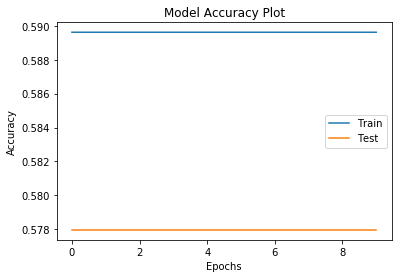

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'],loc = 'upper left')
plt.show()

#### 2. CNN-LSTM

In [42]:
# CNN-LSTM

cnn_lstm = Sequential()
cnn_lstm.add(Embedding(input_dim = vocab, output_dim = 100, input_length = 100))
cnn_lstm.add(Dropout(0.2))
cnn_lstm.add(Conv1D(128, 3, activation = 'relu'))
cnn_lstm.add(MaxPooling1D(pool_size = 4))
cnn_lstm.add(LSTM(10))
cnn_lstm.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'sigmoid')) 
cnn_lstm.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
lstm_history = cnn_lstm.fit(Xwords_train, ywords_train, 
          epochs = 20, batch_size = 64, verbose = 1, 
          validation_data = (Xwords_test, ywords_test))

Train on 1484 samples, validate on 372 samples
Epoch 1/20
1484/1484 [==============================] - 2s 2ms/step - loss: 0.6790 - acc: 0.5788 - val_loss: 0.6812 - val_acc: 0.5780
Epoch 2/20
1484/1484 [==============================] - 1s 872us/step - loss: 0.6783 - acc: 0.5896 - val_loss: 0.6846 - val_acc: 0.5780
Epoch 3/20
1484/1484 [==============================] - 1s 883us/step - loss: 0.6788 - acc: 0.5896 - val_loss: 0.6815 - val_acc: 0.5780
Epoch 4/20
1484/1484 [==============================] - 1s 883us/step - loss: 0.6775 - acc: 0.5896 - val_loss: 0.6831 - val_acc: 0.5780
Epoch 5/20
1484/1484 [==============================] - 1s 895us/step - loss: 0.6775 - acc: 0.5896 - val_loss: 0.6787 - val_acc: 0.5780
Epoch 6/20
1484/1484 [==============================] - 1s 891us/step - loss: 0.6593 - acc: 0.5903 - val_loss: 0.6407 - val_acc: 0.6398
Epoch 7/20
1484/1484 [==============================] - 1s 869us/step - loss: 0.5688 - acc: 0.7392 - val_loss: 0.6467 - val_acc: 0.6290
Epo

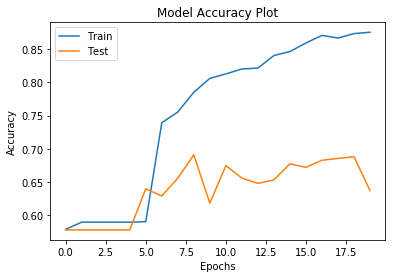

In [45]:
plt.plot(lstm_history.history['acc'])
plt.plot(lstm_history.history['val_acc'])
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'],loc = 'upper left')
plt.show()